In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import wntr.network

from Experiment.detection import *

In [2]:
methods = ["", "no_cor_", "no_re_", "no_fis_", "real_", "2019_"]
fis_result = {}
pressure_result = {}
pressure_detection = {}
detection_flag_times = {}
for method in methods:
    fis_result[method] = {}
    pressure_result[method] = {}
    pressure_detection[method] = {}
    detection_flag_times[method] = {}
pi = {}
center_df = {}
leakage_center = {}
detection_correction = {}
economic_value = {}
for method in methods:
    center_df[method] = {}
    leakage_center[method] = {}
    detection_correction[method] = {}
    economic_value[method] = {}
    pi[method] = {}

for method in methods:
    with open(os.path.join(RESULT_PATH, f"{method}leak_identification_AB.pickle"), 'rb') as f:
        fis_result[method]["AB"], pressure_result[method]["AB"], pressure_detection[method]["AB"], detection_flag_times[method]["AB"] = pickle.load(f)
    with open(os.path.join(RESULT_PATH, f"{method}leak_identification_C.pickle"), 'rb') as f:
        fis_result[method]["C"], pressure_result[method]["C"], pressure_detection[method]["C"], detection_flag_times[method]["C"] = pickle.load(f)
    with open(os.path.join(RESULT_PATH, f"{method}leak_location_AB.pickle"), 'rb') as f:
        pi[method]["AB"], center_df[method]["AB"], leakage_center[method]["AB"], detection_correction[method]["AB"], economic_value[method]["AB"] = pickle.load(f)
    with open(os.path.join(RESULT_PATH, f"{method}leak_location_C.pickle"), 'rb') as f:
        pi[method]["C"], center_df[method]["C"], leakage_center[method]["C"], detection_correction[method]["C"], economic_value[method]["C"] = pickle.load(f)
    with open(os.path.join(RESULT_PATH, f"{method}leak_detection_ABC.pickle"), "rb") as f:
        _, _, economic_value[method]["ABC"] = pickle.load(f)
        print(f"区域ABC FIS 泄漏检测结果已加载至 {RESULT_PATH}/{method}leak_detection_ABC.pickle")

区域ABC FIS 泄漏检测结果已加载至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/leak_detection_ABC.pickle
区域ABC FIS 泄漏检测结果已加载至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/no_cor_leak_detection_ABC.pickle
区域ABC FIS 泄漏检测结果已加载至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/no_re_leak_detection_ABC.pickle
区域ABC FIS 泄漏检测结果已加载至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/no_fis_leak_detection_ABC.pickle
区域ABC FIS 泄漏检测结果已加载至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/real_leak_detection_ABC.pickle
区域ABC FIS 泄漏检测结果已加载至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/2019_leak_detection_ABC.pickle


In [3]:
inp_file = os.path.join(DATA_PATH, "L-TOWN_v2_Model.inp")


In [29]:
leakage_center['real_']['AB']

x_center     y_center  \
2018-01-29   320.238048  1055.319647   
2018-02-02  1102.302456   685.025220   
2018-02-04  1192.731397   655.728985   
2018-02-18   322.645000   316.320000   
2018-02-26   275.000000   472.290000   
...                 ...          ...   
2019-11-15  1953.771103   630.870968   
2019-11-23  1953.775618   630.871729   
2019-11-28  1944.352395   622.710573   
2019-12-06  2250.101204   401.642471   
2019-12-25  2816.365000   780.200000   

                                                     distance  \
2018-01-29                                                 []   
2018-02-02                                 [71.2202644853175]   
2018-02-04                                [62.48466758712844]   
2018-02-18                               [120.27481615034796]   
2018-02-26                                [49.44482404660771]   
...                                                       ...   
2019-11-15  [275.33079514336777, 232.71461066896356, 187.0...   
2019-11-23  [275.3313374728847, 232.7191524860179, 187.011...   
2019-11-28  [280.7326255503249, 221.39890147865947, 181.09...   
2019-12-06           [163.25722552068234, 258.12668290257074]   
2019-12-25                                              [0.0]   

                                pipe min_pipe         p257        p461  \
2018-01-29                        []     p300   515.178562  634.120282   
2018-02-02                    [p232]     p610  1196.568518  874.547179   
2018-02-04                    [p232]     p622  1279.970176  953.656667   
2018-02-18                    [p461]     p471  1253.914014  120.274816   
2018-02-26                    [p461]      p99  1097.898743   49.444824   
...                              ...      ...          ...         ...   
2019-11-15  [p710, p680, p721, p762]     p211  1904.489207         inf   
2019-11-23  [p710, p680, p721, p762]     p211  1904.492759         inf   
2019-11-28  [p710, p680, p721, p762]     p745  1900.355334         inf   
2019-12-06              [p810, p762]     p807  2275.944983         inf   
2019-12-25                    [p879]     p879  2640.334251         inf   

                 p232         p427  p673  ...  p142         p680  p586  \
2018-01-29        inf          inf   inf  ...   inf          inf   inf   
2018-02-02  71.220264          inf   inf  ...   inf          inf   inf   
2018-02-04  62.484668          inf   inf  ...   inf          inf   inf   
2018-02-18        inf  1165.401437   inf  ...   inf          inf   inf   
2018-02-26        inf  1129.727511   inf  ...   inf          inf   inf   
...               ...          ...   ...  ...   ...          ...   ...   
2019-11-15        inf   737.885124   inf  ...   inf   232.714611   inf   
2019-11-23        inf   737.888821   inf  ...   inf   232.719152   inf   
2019-11-28        inf   733.197540   inf  ...   inf   221.398901   inf   
2019-12-06        inf  1107.807476   inf  ...   inf   543.819893   inf   
2019-12-25        inf  1533.324930   inf  ...   inf  1106.780551   inf   

                   p721  p800         p123         p455        p762  \
2018-01-29          inf   inf          inf          inf         inf   
2018-02-02          inf   inf          inf          inf         inf   
2018-02-04          inf   inf          inf          inf         inf   
2018-02-18          inf   inf          inf          inf         inf   
2018-02-26          inf   inf          inf          inf         inf   
...                 ...   ...          ...          ...         ...   
2019-11-15   187.007128   inf  1067.644237  1794.181435  139.726444   
2019-11-23   187.011146   inf  1067.648613  1794.186013  139.722149   
2019-11-28   181.092885   inf  1059.413212  1783.599633  147.791840   
2019-12-06   555.056993   inf  1404.096943  2068.537333  258.126683   
2019-12-25  1043.078641   inf  1921.115329  2669.562322  746.158756   

                   p426        p879  
2018-01-29          inf         inf  
2018-02-02          inf         inf  
2018-02-

In [60]:
economic_value

{'perfect': 750604.7999999996,
 'S': 680252.2784879387,
 'cost_w': 716752.2784879387,
 'cost_r': 36500.0,
 'tp': 34,
 'fp': 3,
 'total': 33}

# 实验数据展示

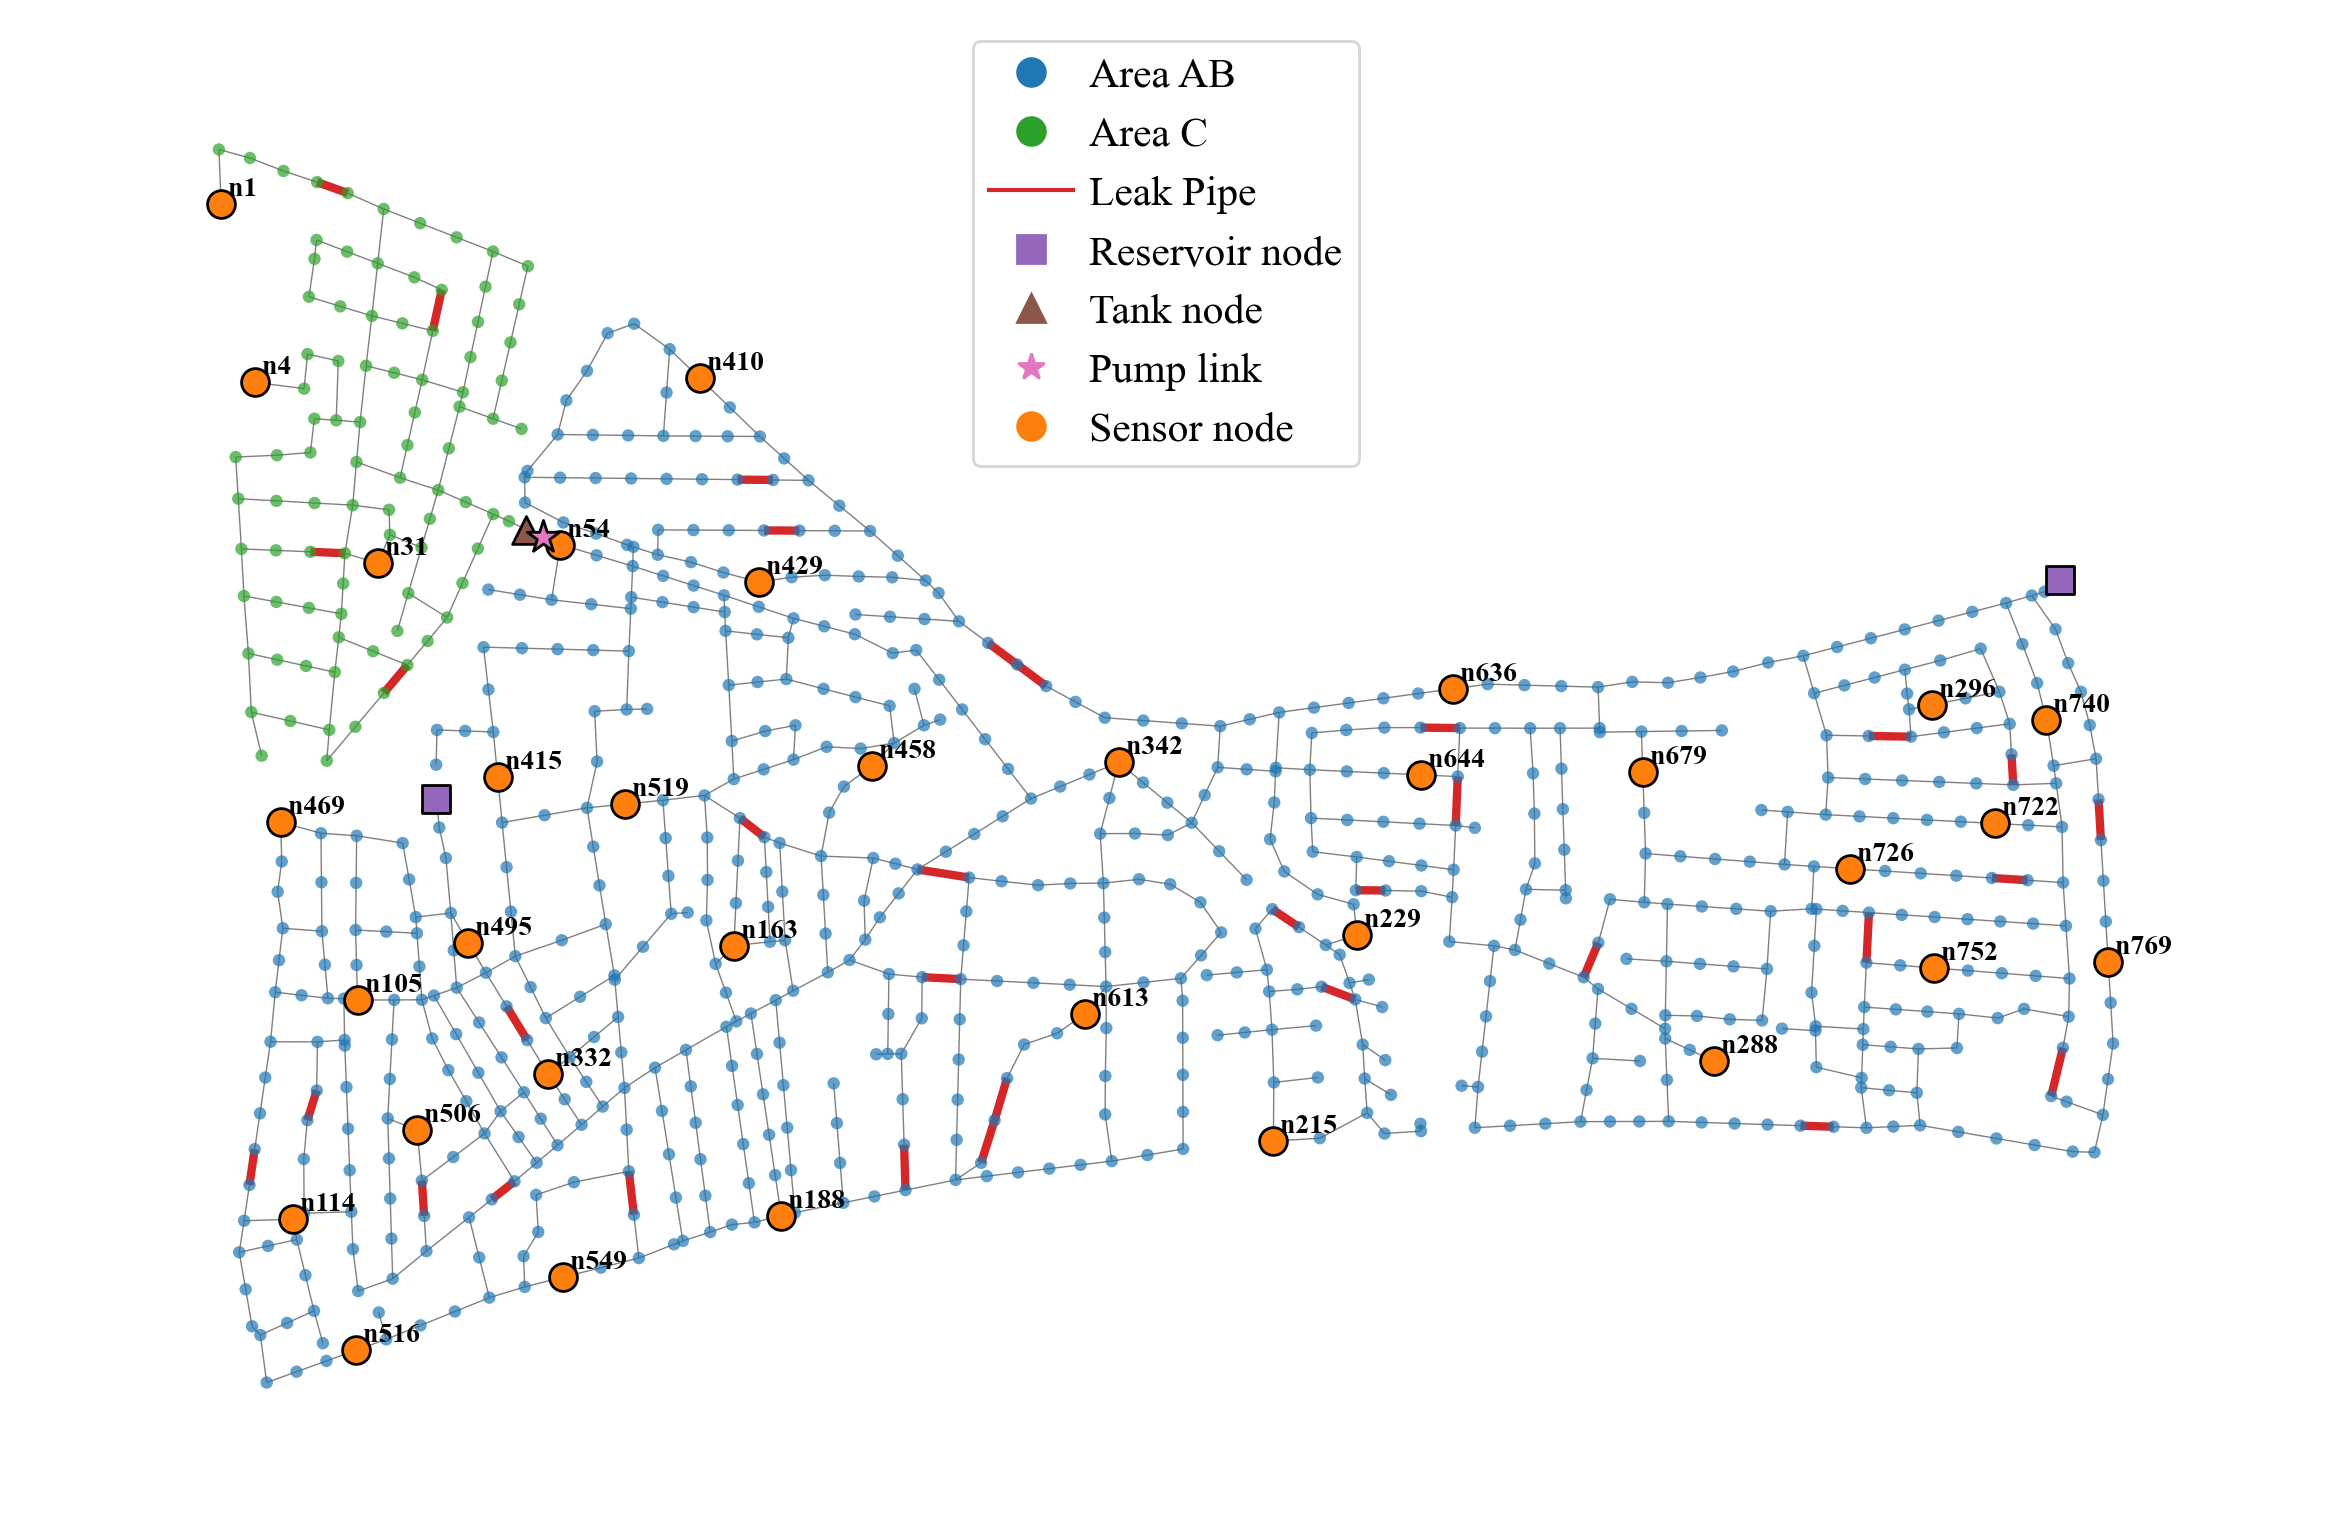

In [7]:
def plot_network(title):
    wn = wntr.network.WaterNetworkModel(f'{DATA_PATH}/L-TOWN_v2_model.inp')
    node_value = wn.node_name_list
    area_C_node = []
    for node in node_value:
        if hasattr(wn.get_node(node), 'elevation') and wn.get_node(node).elevation is not None:
            if wn.get_node(node).elevation > 50:
                area_C_node.append(node)
    area_AB_nodes = [node for node in node_value if node not in area_C_node]
    leak_pipe = [item[0] for item in leak_2018_data + leak_2019_data]

    # 节点属性
    node_attr = {}
    link_attr = {}
    for node in area_AB_nodes:
        node_attr[node] = 0
    for node in area_C_node:
        node_attr[node] = 1
    for link in leak_pipe:
        link_attr[link] = 0
    node_cmap = [hexs[0], hexs[2]]
    link_cmap = [hexs[3]]

    # 绘图
    fig, ax = plt.subplots(figsize=(12, 8), dpi=200)
    wntr.graphics.plot_network(
        wn=wn,
        link_attribute=link_attr,
        link_cmap=link_cmap,
        link_width=3,
        node_attribute=node_attr,
        node_cmap=node_cmap,
        node_size=20,
        node_alpha=0.7,
        add_colorbar=False,
        link_colorbar_label='Leak Probability',
        node_colorbar_label='Leak pipe & Leak center',
        ax=ax,
        show_plot=False
    )
    # ax.set_title(f"{title}", fontweight='bold')

    nodes = DMA_AB_sensors + DMA_C_sensors
    for node in nodes:
        node_pos = [wn.get_node(node).coordinates[0], wn.get_node(node).coordinates[1]]
        ax.scatter(*node_pos, color=hexs[1], s=100, marker='o', zorder=5, edgecolor='black', linewidths=1)
        ax.text(node_pos[0] + 10, node_pos[1] + 10, node, fontsize=10, weight='bold')

    R1_pos = [wn.get_node("R1").coordinates[0], wn.get_node("R1").coordinates[1]]
    ax.scatter(*R1_pos, color=hexs[4], s=100, marker='s', zorder=5, edgecolor='black', linewidths=1)
    R2_pos = [wn.get_node("R2").coordinates[0], wn.get_node("R2").coordinates[1]]
    ax.scatter(*R2_pos, color=hexs[4], s=100, marker='s', zorder=5, edgecolor='black', linewidths=1)

    T1_pos = [wn.get_node("T1").coordinates[0], wn.get_node("T1").coordinates[1]]
    ax.scatter(*T1_pos, color=hexs[5], s=100, marker='^', zorder=5, edgecolor='black', linewidths=1)

    pump_link = wn.get_link("PUMP_1")
    pump_pos = [(pump_link.start_node.coordinates[0] + pump_link.end_node.coordinates[0]) / 2,
                (pump_link.start_node.coordinates[1] + pump_link.end_node.coordinates[1]) / 2]
    ax.scatter(*pump_pos, color=hexs[6], s=150, marker='*', zorder=5, edgecolor='black', linewidths=1)

    # === 7. 添加标注文字 ===
    # ax.text(leak_pos[0] + 30, leak_pos[1] + 30, 'True Leak', color='tab:orange', fontsize=9, weight='bold')
    # ax.text(center_pos[0] + 30, center_pos[1] + 30, 'Detected Center', color='tab:red', fontsize=9, weight='bold')

    # === 8. 添加自定义图例 ===
    area_ab_handle = mlines.Line2D([], [], color=hexs[0], marker='o', linestyle='None',
                                markersize=10, label='Area AB')
    area_c_handle = mlines.Line2D([], [], color=hexs[2], marker='o', linestyle='None',
                                markersize=10, label='Area C')
    leak_pipe_handle = mlines.Line2D([], [], color=hexs[3], linestyle='-',
                                markersize=10, label='Leak Pipe')
    reservoir_handle = mlines.Line2D([], [], color=hexs[4], marker='s', linestyle='None',
                                markersize=10, label='Reservoir node')
    tank_handle = mlines.Line2D([], [], color=hexs[5], marker='^', linestyle='None',
                                markersize=10, label='Tank node')
    pump_leak_handle = mlines.Line2D([], [], color=hexs[6], marker='*', linestyle='None',
                                markersize=10, label='Pump link')
    sensor_handle = mlines.Line2D([], [], color=hexs[1], marker='o', linestyle='None',
                                markersize=10, label='Sensor node')


    ax.legend(handles=[area_ab_handle, area_c_handle, leak_pipe_handle, reservoir_handle, tank_handle, pump_leak_handle, sensor_handle],
              loc='upper center', fontsize=15, frameon=True, facecolor='white',
              borderaxespad=0.5, handletextpad=0.4)

    # ax.set_title(f"{title}", fontweight='bold')
    plt.tight_layout()
    plt.savefig(f'{FIG_PATH}/{title}.png', dpi=300)
    plt.savefig(f'{FIG_PATH}/{title}.pdf', dpi=300)
    plt.show()
plot_network("network")

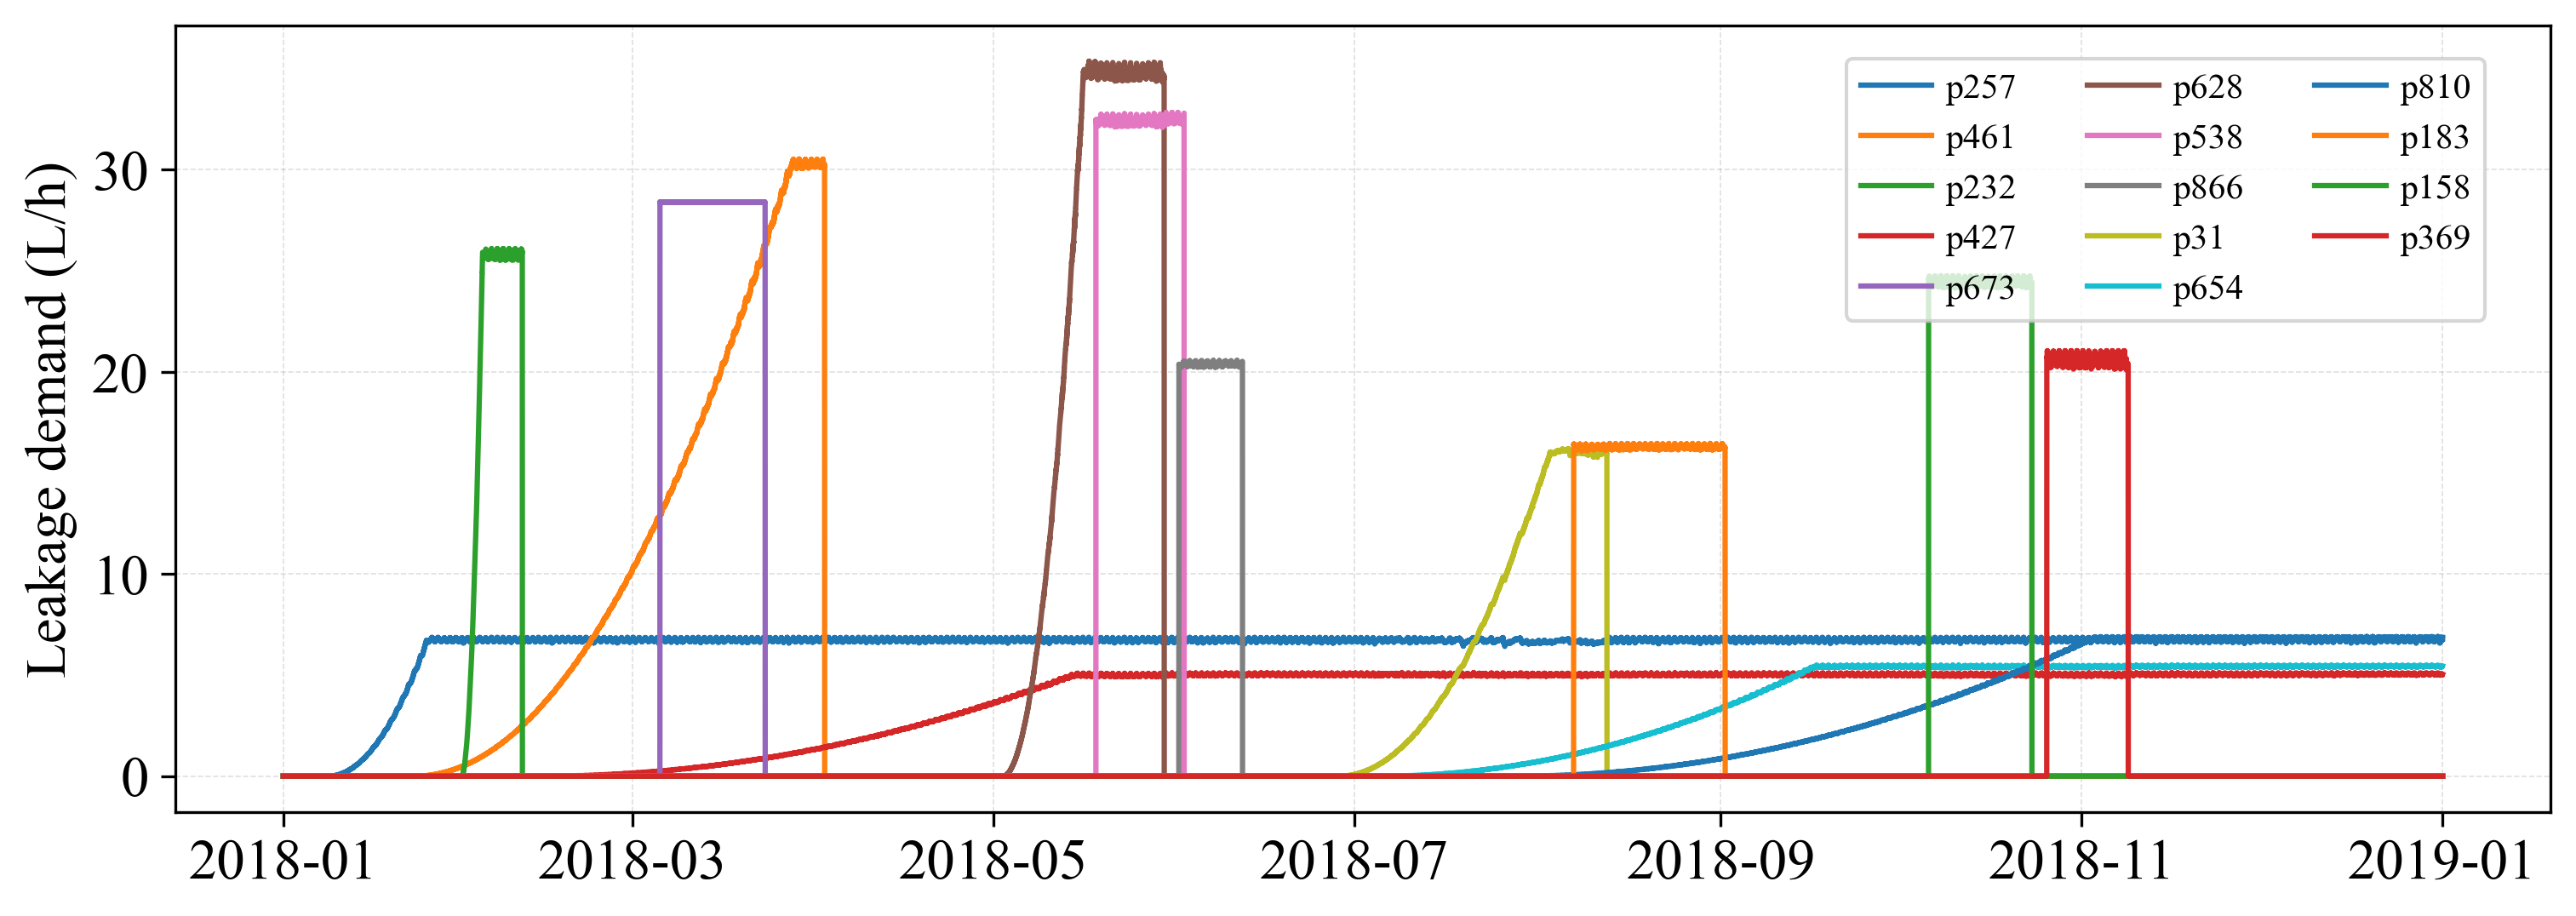

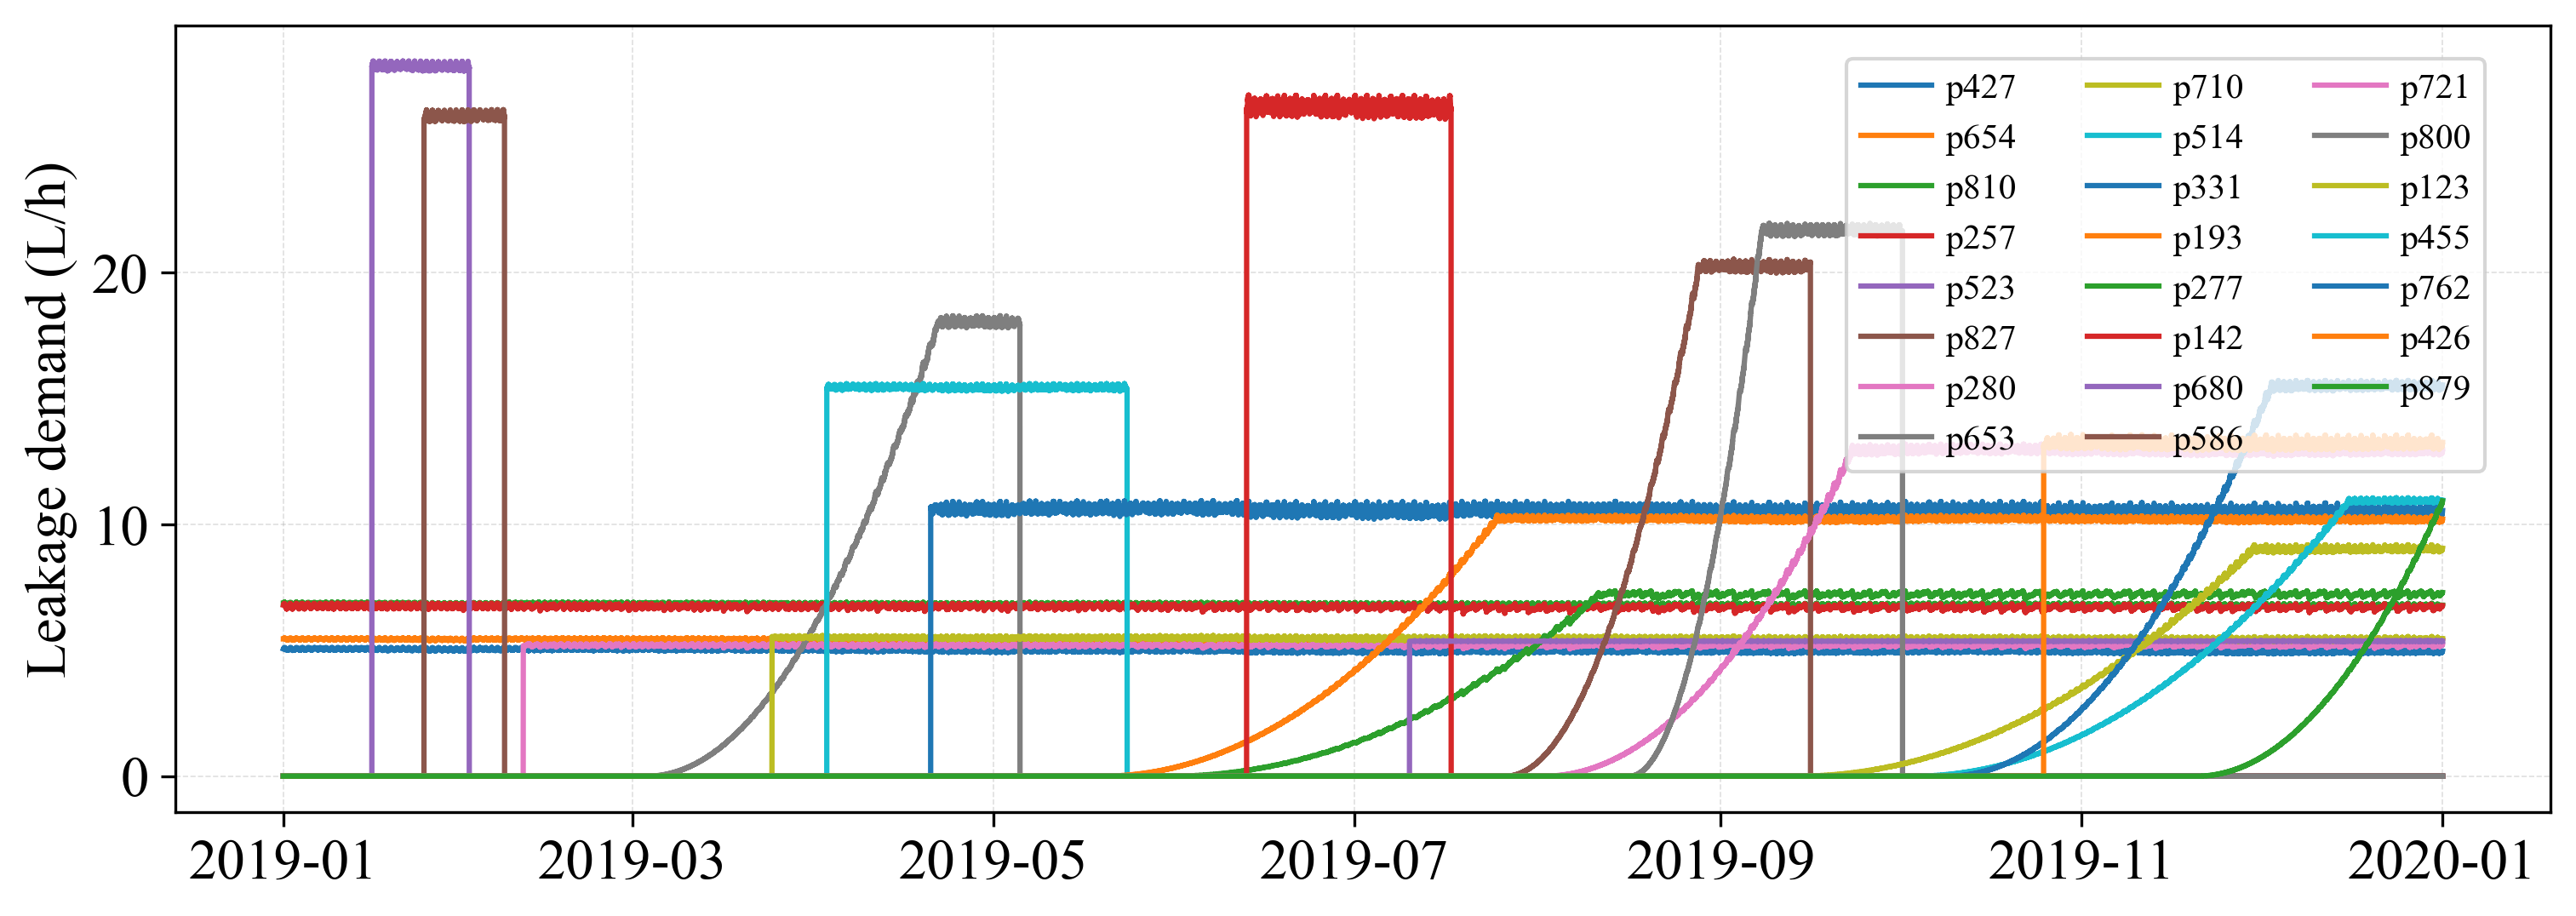

In [8]:
def plot_leak_data(year):
    # 读取泄漏需求数据
    leak = pd.read_csv(f"{File_PATH}/{year}_leak_demand.csv", index_col=0, parse_dates=True)

    fig, ax = plt.subplots(figsize=(12, 4), dpi=300)

    def plot_leak_and_detection(ax, leak_data, year):
        colors = {}  # 保存每条管道的颜色
        for column in leak_data.columns:
            line = ax.plot(leak_data.index, leak_data[column], label=column, linewidth=1.5)

        ax.set_ylabel(r"Leakage demand (L/h)")

        ax.tick_params(axis='both', direction='out', length=4, width=0.8)
        ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.4)
        ax.legend(loc='upper right', frameon=True, borderaxespad=0.5, handletextpad=0.4, ncol=2)
        # ax.set_title(f"Leakage detection time & predict start time in {year}")
        # ax.set_xlabel('(a)' if year == 2018 else '(b)')

        # start_line = mlines.Line2D([], [], color='black', linestyle='-.', linewidth=1, label='Predict Start time')
        # detect_line = mlines.Line2D([], [], color='black', linestyle='--', linewidth=1, label='Detection time')
        ax.legend(
                  loc='upper right',
                  bbox_to_anchor=(0.98, 0.98),
                  frameon=True,
                borderaxespad=0.5,
                handletextpad=0.4,
                ncol=3,
                  fontsize=10)

    plot_leak_and_detection(ax, leak, year)

    # fig.subplots_adjust(left=0.08, right=0.78, top=0.95, bottom=0.08)  # 调整边距
    plt.savefig(f"{FIG_PATH}/leak_events_{year}.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"{FIG_PATH}/leak_events_{year}.pdf", dpi=300, bbox_inches='tight')
    plt.show()


plot_leak_data(2018)
plot_leak_data(2019)


# 实验结果

In [250]:
# 定位结果表格
leak_data = leak_data
leak_events = pd.DataFrame(leak_data, columns=["linkID", "startTime", "endTime"])
detection_correction_ideal = {
    "AB": detection_correction['']['AB'],
    "C": detection_correction['']['C'],
}
leakage_center_ideal = {
    "AB": leakage_center['']['AB'],
    "C": leakage_center['']['C']
}

# 绘制检测定位结果表格
def plot_detection_table():
    detection_table = pd.DataFrame(columns=['Leak Pipe', 'Start Time', 'End Time', 'Leakage Center', 'Detection Time', 'Distance'])
    for item in detection_correction_ideal:
        for index in detection_correction_ideal[item].index:
            record = detection_correction_ideal[item].loc[index]
            pipe = record['pipe']
            if pd.isna(pipe):
                continue
            leak = leak_events.set_index('linkID').loc[pipe]

            start = leak['startTime']
            end = leak['endTime']
            detect = record['detection_time']
            leak_center = leakage_center_ideal[item].loc[detect]
            distance = record['distance']
            center = (int(leak_center['x_center']), int(leak_center['y_center']))
            detect = pd.to_datetime(detect).replace(second=0, microsecond=0)
            # yy-mm-dd hh:mm 格式
            detect = pd.to_datetime(detect.normalize() + pd.Timedelta(hours=23, minutes=59)).strftime('%Y-%m-%d %H:%M')
            detection_table.loc[len(detection_table)] = [
                pipe, start, end, center, detect, distance
            ]
    detection_table.sort_values(by=['Start Time'], inplace=True)
    detection_table.to_csv(f"{FIG_PATH}/detection_table.csv", index=False)
    return detection_table
plot_detection_table()

Leak Pipe        Start Time          End Time Leakage Center  \
28      p257  2018-01-08 13:30  2019-12-31 23:55    (273, 1576)   
1       p461  2018-01-23 04:25  2018-04-02 11:40     (275, 472)   
0       p232  2018-01-31 02:35  2018-02-10 09:20    (1117, 583)   
3       p427  2018-02-13 08:25  2019-12-31 23:55    (1284, 966)   
2       p673  2018-03-05 15:45  2018-03-23 10:25    (1621, 644)   
4       p628  2018-05-02 14:55  2018-05-29 21:20    (1103, 612)   
5       p538  2018-05-18 08:35  2018-06-02 06:05     (602, 362)   
6       p866  2018-06-01 09:05  2018-06-12 03:00    (2691, 842)   
29       p31  2018-06-28 10:35  2018-08-12 17:30    (326, 1095)   
9       p654  2018-07-05 03:40  2019-12-31 23:55    (1096, 363)   
7       p810  2018-07-28 03:05  2019-12-31 23:55    (2487, 633)   
8       p183  2018-08-07 02:35  2018-09-01 17:10    (2487, 633)   
10      p158  2018-10-06 02:35  2018-10-23 13:35    (1905, 787)   
11      p369  2018-10-26 02:05  2018-11-08 20:25    (937, 1141)   
12      p523  2019-01-15 23:00  2019-02-01 09:50     (446, 343)   
13      p827  2019-01-24 18:30  2019-02-07 09:05    (2688, 706)   
30      p280  2019-02-10 13:05  2019-12-31 23:55    (440, 1354)   
16      p653  2019-03-03 13:10  2019-05-05 12:10    (1449, 516)   
14      p710  2019-03-24 14:15  2019-12-31 23:55    (1920, 833)   
15      p514  2019-04-02 20:40  2019-05-23 14:55     (647, 468)   
17      p331  2019-04-20 10:10  2019-12-31 23:55   (1060, 1133)   
19      p193  2019-05-19 10:40  2019-12-31 23:55    (2628, 591)   
31      p277  2019-05-30 21:55  2019-12-31 23:55    (483, 1355)   
18      p142  2019-06-12 19:55  2019-07-17 09:25    (1246, 687)   
20      p680  2019-07-10 08:45  2019-12-31 23:55    (1638, 799)   
21      p586  2019-07-26 14:40  2019-09-16 03:20     (579, 250)   
23      p721  2019-08-02 03:00  2019-12-31 23:55    (1692, 786)   
22      p800  2019-08-16 14:00  2019-10-01 16:35    (2368, 980)   
32      p800  2019-08-16 14:00  2019-10-01 16:35   (2749, 1072)   
24      p123  2019-09-13 20:05  2019-12-31 23:55     (903, 949)   
27      p455  2019-10-03 14:00  2019-12-31 23:55     (174, 301)   
26      p762  2019-10-09 10:15  2019-12-31 23:55    (2325, 545)   
25      p426  2019-10-25 13:25  2019-12-31 23:55    (1425, 905)   
33      p879  2019-11-20 11:55  2019-12-31 23:55   (2749, 1072)   

      Detection Time    Distance  
28  2018-01-22 23:59   23.928711  
1   2018-02-19 23:59   49.444824  
0   2018-02-02 23:59  139.380172  
3   2018-04-24 23:59   10.674820  
2   2018-03-05 23:59   36.803471  
4   2018-05-07 23:59  266.352406  
5   2018-05-18 23:59   77.400175  
6   2018-06-01 23:59    0.000000  
29  2018-07-14 23:59  152.429422  
9   2018-08-26 23:59  167.800505  
7   2018-08-07 23:59  247.969665  
8   2018-08-07 23:59    1.988281  
10  2018-10-06 23:59   17.126436  
11  2018-10-26 23:59    0.002567  
12  2019-01-16 23:59   42.206612  
13  2019-01-25 23:59    0.000000  
30  2019-02-14 23:59  283.710937  
16  2019-04-10 23:59  258.415671  
14  2019-03-26 23:59   76.186789  
15  2019-04-03 23:59  104.641939  
17  2019-04-20 23:59  176.177375  
19  2019-07-03 23:59  179.380079  
31  2019-07-17 23:59   71.615485  
18  2019-06-13 23:59  132.903380  
20  2019-07-11 23:59  253.761823  
21  2019-08-10 23:59  156.747672  
23  2019-09-24 23:59  127.299196  
22  2019-08-30 23:59  176.998622  
32  2019-09-11 23:59  298.474488  
24  2019-10-25 23:59  179.800120  
27  2019-12-12 23:59   45.354454  
26  2019-11-10 23:59  241.512998  
25  2019-10-27 23:59  191.460586  
33  2019-12-04 23:59  299.837807

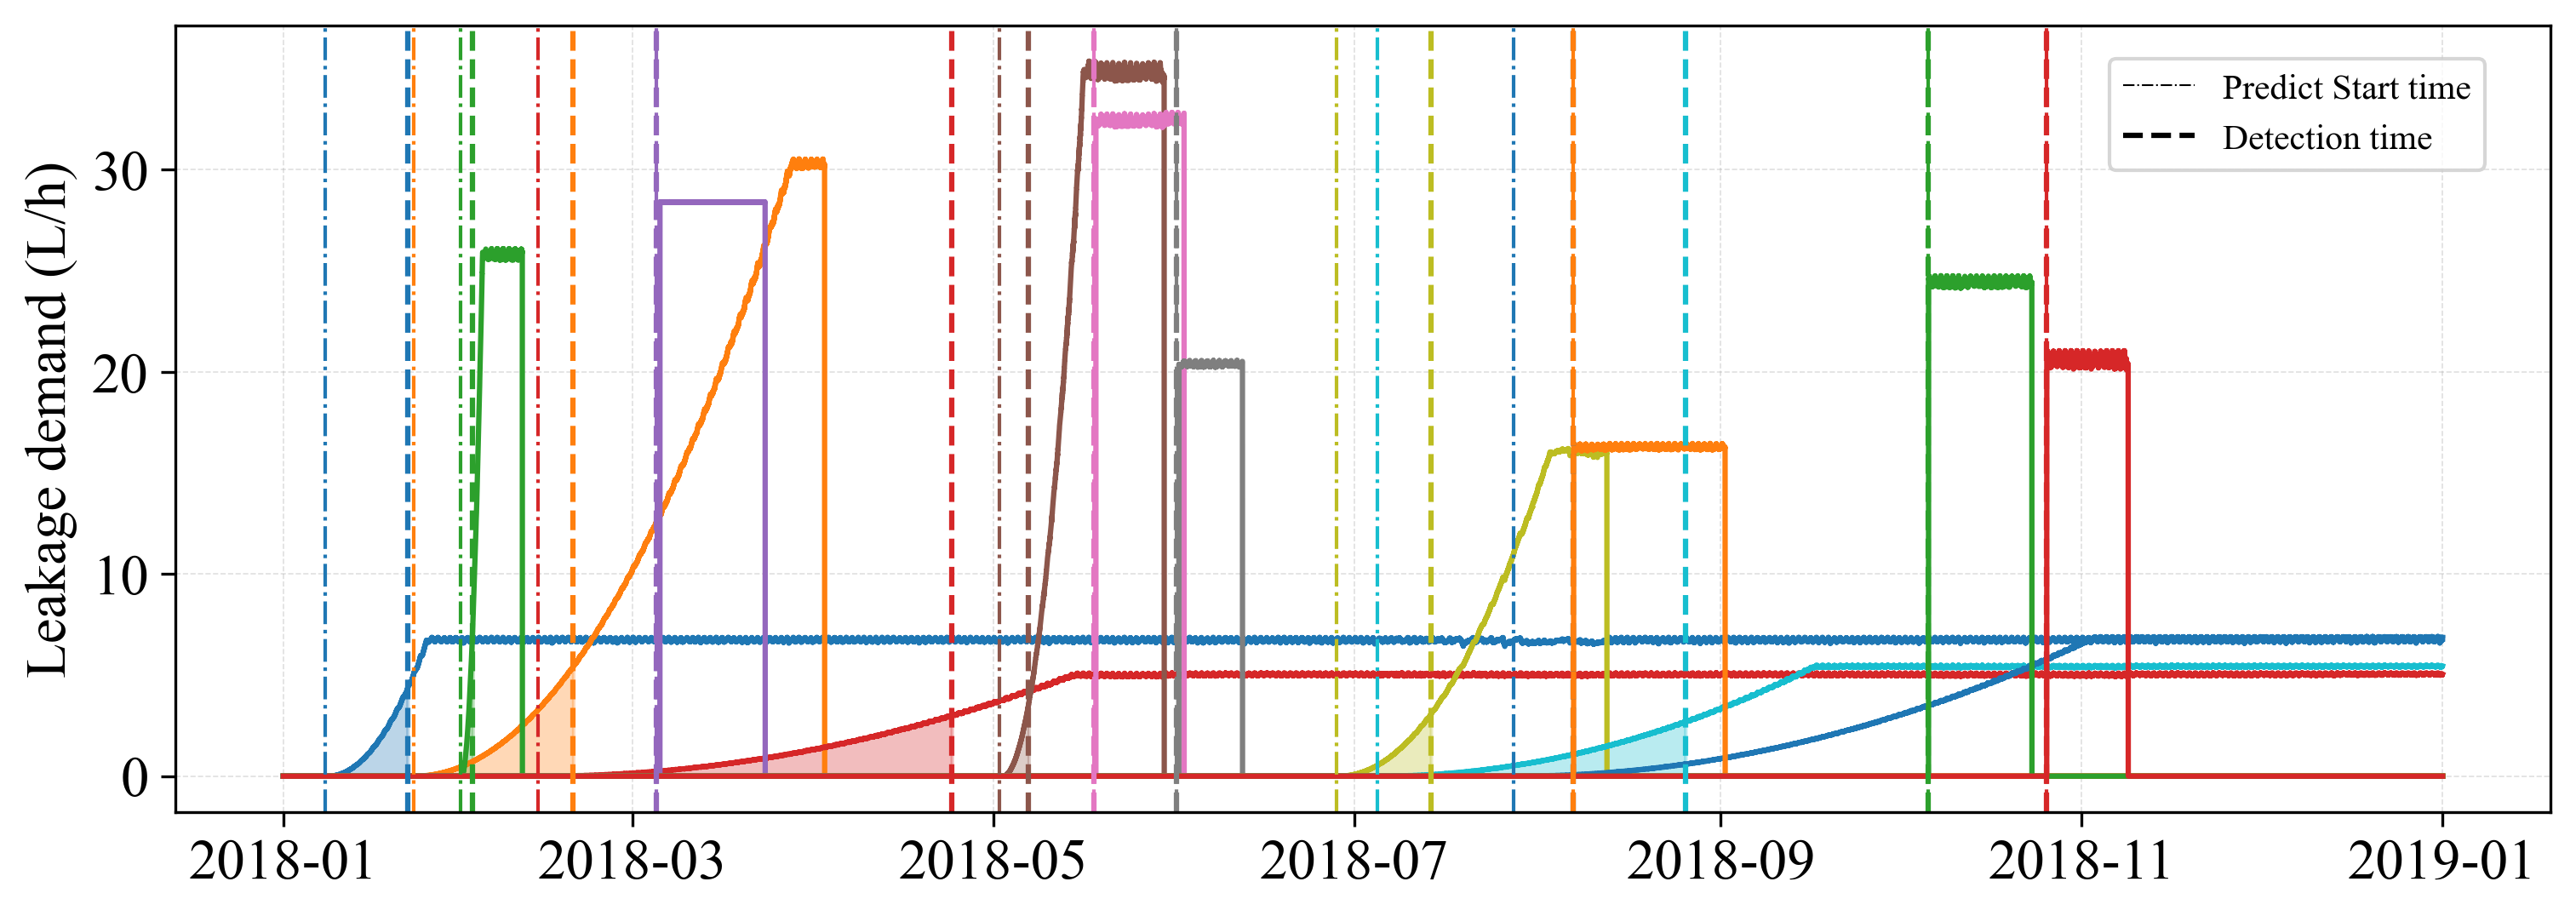

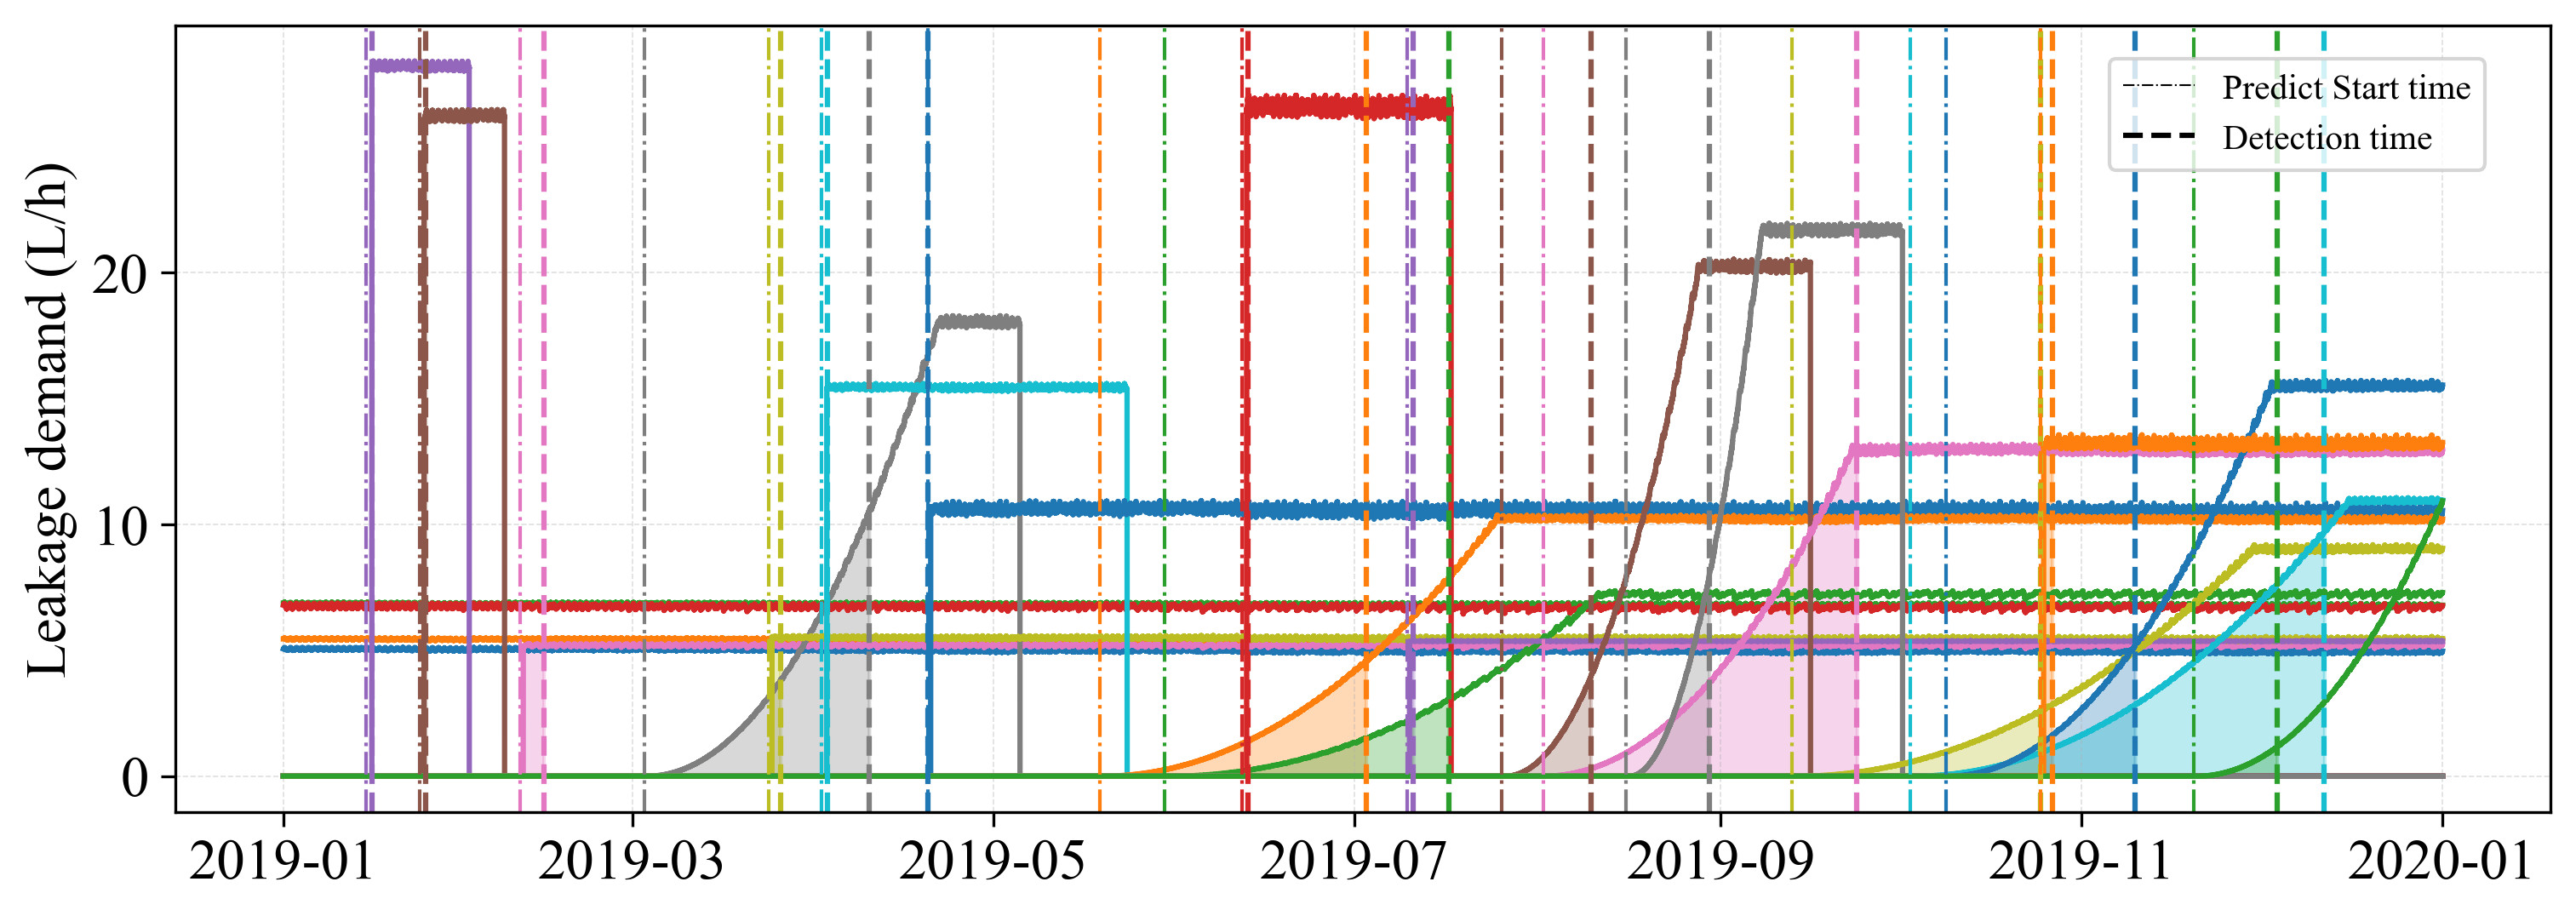

In [20]:
# 泄漏识别图
def plot_detection_time(year):
    # 读取泄漏需求数据
    leak = pd.read_csv(f"{File_PATH}/{year}_leak_demand.csv", index_col=0, parse_dates=True)

    fig, ax = plt.subplots(figsize=(12, 4), dpi=300)

    def plot_leak_and_detection(ax, leak_data, year):
        colors = {}  # 保存每条管道的颜色
        for column in leak_data.columns:
            line = ax.plot(leak_data.index, leak_data[column], label=column, linewidth=1.5)
            colors[column] = line[0].get_color()

        # 绘制 start_time 到 detection_time 的面积图
        for item in detection_correction:
            for index in detection_correction[item].index:
                record = detection_correction[item].loc[index]
                if pd.to_datetime(record['start_time']).year == year:
                    pipe = record['pipe']
                    start = pd.to_datetime(record['start_time'])
                    detect = pd.to_datetime(record['detection_time'])
                    if pipe in leak_data.columns:
                        # 面积图
                        mask = (leak_data.index >= start) & (leak_data.index <= detect)
                        ax.fill_between(leak_data.index[mask], leak_data[pipe][mask],
                                        color=colors[pipe], alpha=0.3)
                        # 标记 start_time 和 detection_time
                        ax.axvline(start, color=colors[pipe], linestyle='-.', linewidth=1)
                        ax.axvline(detect, color=colors[pipe], linestyle='--', linewidth=1.5)

        ax.set_ylabel(r"Leakage demand (L/h)")

        ax.tick_params(axis='both', direction='out', length=4, width=0.8)
        ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.4)
        ax.legend(loc='upper right', frameon=True, borderaxespad=0.5, handletextpad=0.4, ncol=2)
        # ax.set_title(f"Leakage detection time & predict start time in {year}")
        # ax.set_xlabel('(a)' if year == 2018 else '(b)')

        start_line = mlines.Line2D([], [], color='black', linestyle='-.', linewidth=0.5, label='Predict Start time')
        detect_line = mlines.Line2D([], [], color='black', linestyle='--', linewidth=1.5, label='Detection time')
        ax.legend(handles=[start_line, detect_line],
                  loc='upper right',
                  bbox_to_anchor=(0.98, 0.98),
                  frameon=True,
                  fontsize=10)

    plot_leak_and_detection(ax, leak, year)

    # fig.subplots_adjust(left=0.08, right=0.78, top=0.95, bottom=0.08)  # 调整边距
    plt.savefig(f"{FIG_PATH}/detection_time_{year}.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"{FIG_PATH}/detection_time_{year}.pdf", dpi=300, bbox_inches='tight')
    plt.show()

plot_detection_time(2018)
plot_detection_time(2019)

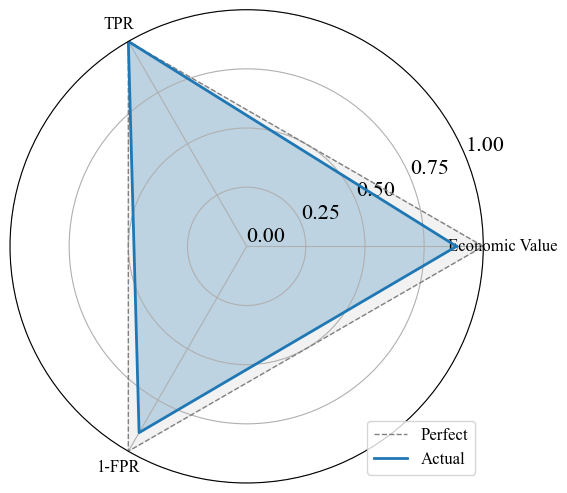

In [4]:
# 评价指标展示
def plot_detection_metrics():
    # === 指标计算 ===
    metrics = ['Economic Value', 'TPR', '1-FPR']
    ideal = [1, 1, 1]  # 理想状态

    # === 绘制雷达图函数 ===
    def plot_radar(ax, data, title, color):
        N = len(metrics)
        angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
        data += data[:1]       # 闭合
        ideal_data = ideal + ideal[:1]
        angles += angles[:1]   # 闭合

        # 绘制理想状态
        ax.plot(angles, ideal_data, color='gray', linestyle='--', linewidth=1, label='Perfect')
        ax.fill(angles, ideal_data, color='gray', alpha=0.1)

        # 绘制实际值
        ax.plot(angles, data, color=color, linewidth=2, label='Actual')
        ax.fill(angles, data, color=color, alpha=0.25)

        # 设置坐标轴
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics, fontsize=12)
        ax.set_yticks(np.linspace(0, 1, 5))
        ax.set_ylim(0, 1)
        ax.legend(loc='lower right', fontsize=12)

    data = [
        economic_value['']['ABC']['S'] / economic_value['']['ABC']['perfect'],
        economic_value['']['ABC']['tp'] / economic_value['']['ABC']['total'],
        1 - economic_value['']['ABC']['fp'] / economic_value['']['ABC']['total']
    ]
    # === 绘图 ===
    fig, axes = plt.subplots(1, 1, subplot_kw=dict(polar=True), figsize=(6, 6))
    plot_radar(axes, data, "Detection Metrics", 'tab:blue')
    plt.tight_layout()
    plt.savefig(f"{FIG_PATH}/detection_metrics.png", dpi=300, bbox_inches='tight')
    plt.savefig(f"{FIG_PATH}/detection_metrics.pdf", dpi=300, bbox_inches='tight')
    plt.show()
plot_detection_metrics()

# 消融实验

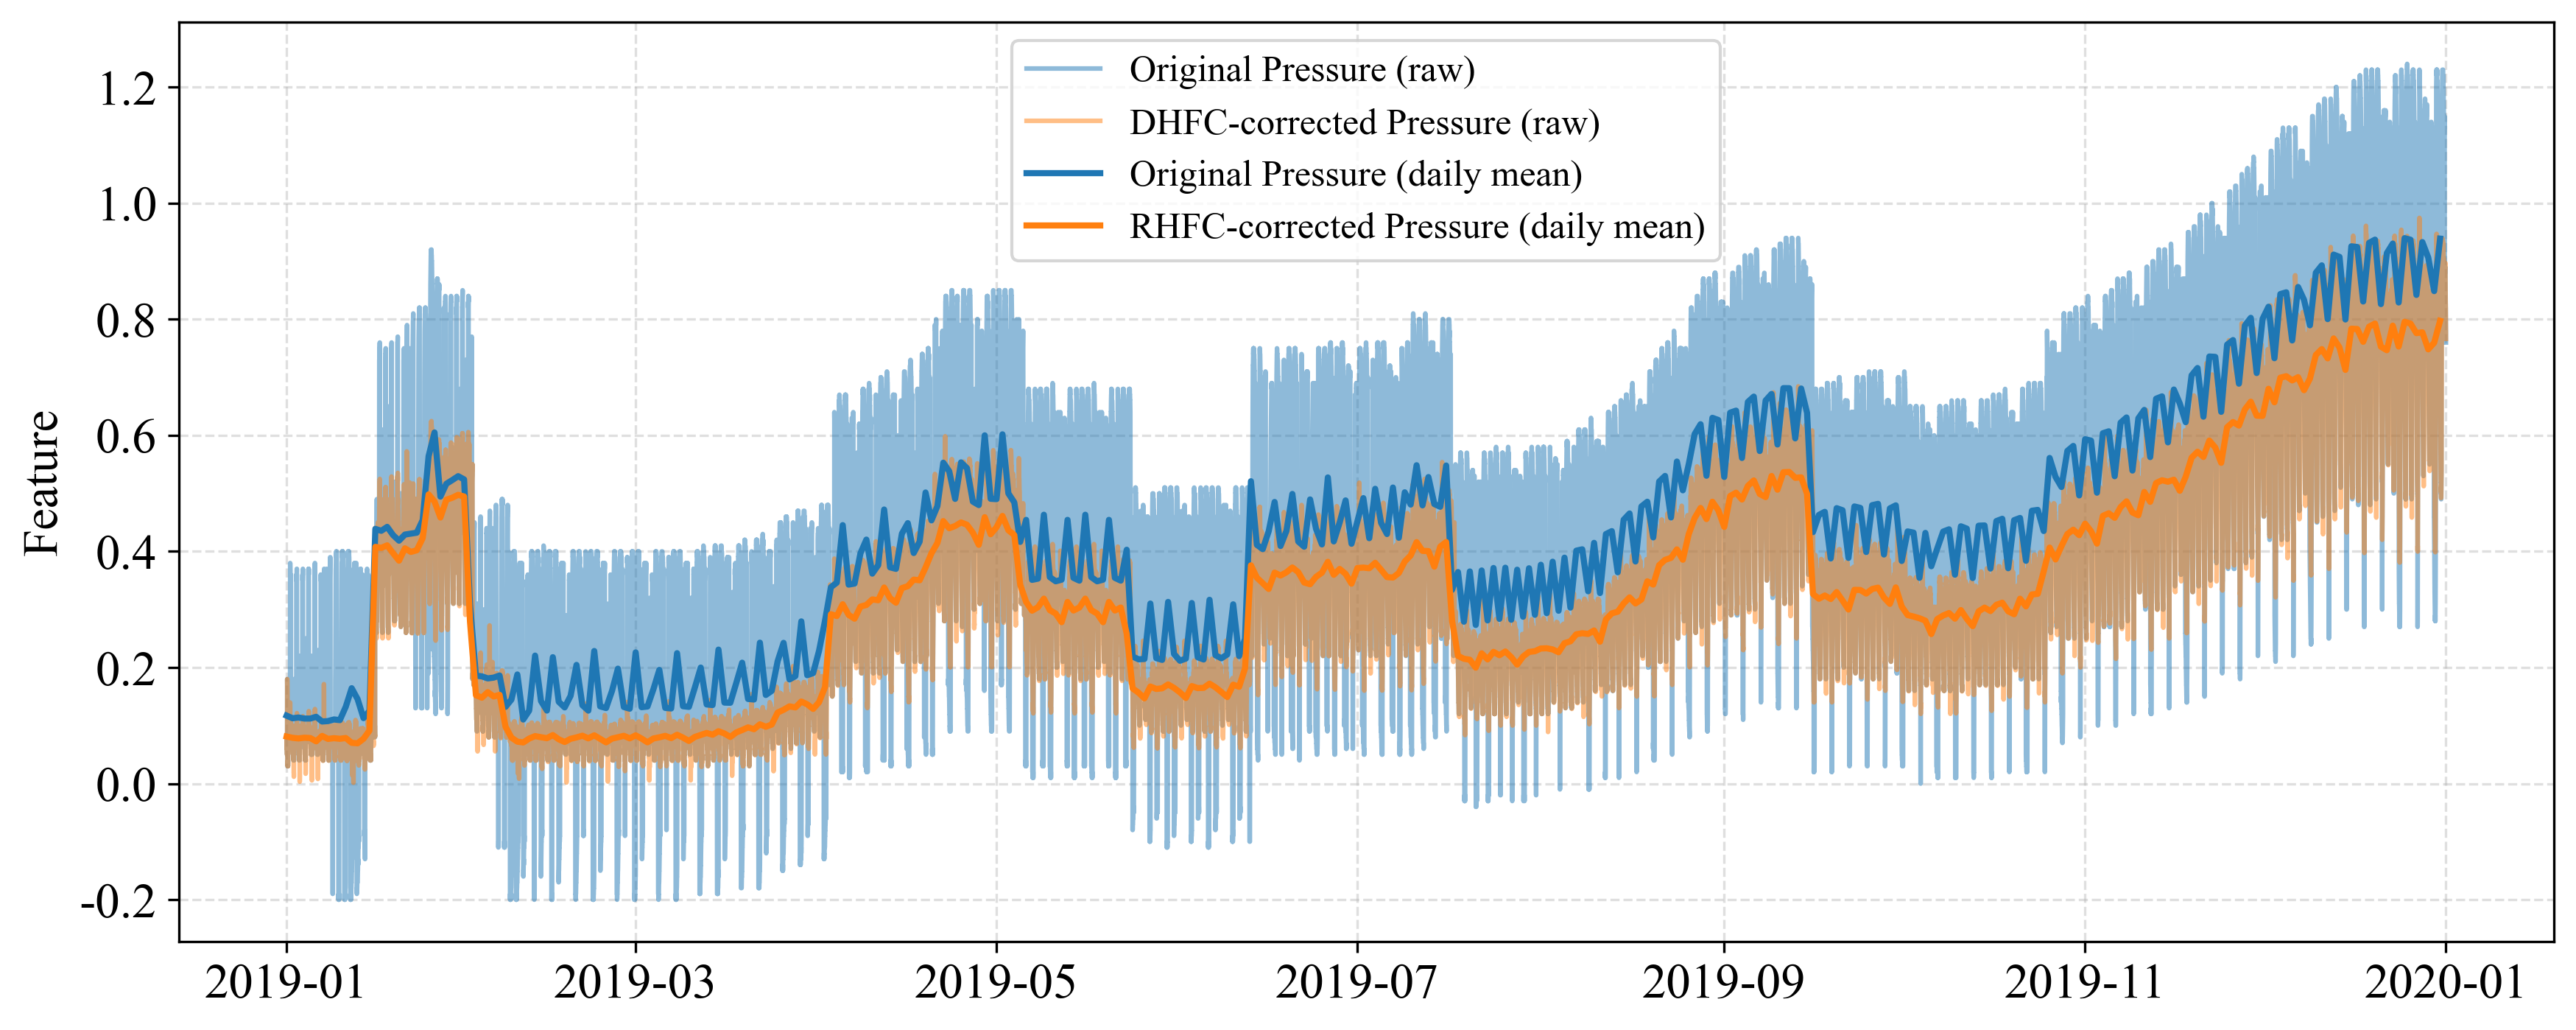

In [91]:
def plot_pressure_comparison():
    sensor = 'n114'

    with open(f"{File_PATH}/pressure_2019.pickle", "rb") as f:
        pressures = pickle.load(f)
    with open(f"{File_PATH}/fix_pressure_2019.pickle", "rb") as f:
        fix_pressures = pickle.load(f)

    pressure_raw = pressures[sensor]
    pressure_fix = fix_pressures[sensor]

    # 日均值
    pressure_raw_daily = pressure_raw.resample("D").mean()
    pressure_fix_daily = pressure_fix.resample("D").mean()

    plt.figure(figsize=(12, 5), dpi=300)

    # 绘制四条曲线
    plt.plot(pressure_raw.index, pressure_raw.values, label='Original Pressure (raw)', color='tab:blue', alpha=0.5)
    plt.plot(pressure_fix.index, pressure_fix.values, label='DHFC-corrected Pressure (raw)', color='tab:orange', alpha=0.5)
    plt.plot(pressure_raw_daily.index, pressure_raw_daily.values, label='Original Pressure (daily mean)', color='tab:blue', linewidth=2)
    plt.plot(pressure_fix_daily.index, pressure_fix_daily.values, label='RHFC-corrected Pressure (daily mean)', color='tab:orange', linewidth=2)

    # plt.xlabel('Time')
    plt.ylabel('Feature')
    # plt.title(f'Sensor {sensor} Pressure Comparison: Original vs RHFC-corrected', fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{FIG_PATH}/DHFC-coorected.png', dpi=300)
    plt.savefig(f'{FIG_PATH}/DHFC-coorected.pdf', dpi=300)
    plt.show()
plot_pressure_comparison()

In [ ]:
# 对比泄漏剔除

In [3]:
with open(f"{File_PATH}/pressure_reset.pickle", "rb") as f:
    pressure_reset = pickle.load(f)

with open(f"{File_PATH}/PUMP_AB_model.pickle", "rb") as f:
    models_DMA_AB = pickle.load(f)
with open(f"{File_PATH}/PUMP_C_model.pickle", "rb") as f:
    models_DMA_C = pickle.load(f)
models = {**models_DMA_AB, **models_DMA_C}

with open(f"{File_PATH}/pressure_reset.pickle", 'rb') as f:
    pressure_reset_data = pickle.load(f)
with open(f"{File_PATH}/no_leak_dataset_2018.pickle", 'rb') as f:
    no_leak_dataset = pickle.load(f)
train_dataset = {}
# 计算无泄漏与泄漏数据差值
for key in no_leak_dataset.keys():
    train_dataset[key] = no_leak_dataset[key].iloc[::3, :] - pressure_reset_data[key].set_index("Timestamp").iloc[:, :]
    train_dataset[key] = train_dataset[key].dropna()

pump_flow = train_dataset['Flows (m3_h)']['PUMP_1']
pressure = train_dataset['Pressures (m)']
fix_pressure = pd.DataFrame(index=pressure.index, columns=pressure.columns)
pre_error = pd.DataFrame(0, index=pressure.index, columns=pressure.columns)

# 模型逐传感器预测
for sensor, model in models.items():
    pre = predict_pump_model(model, pressure[sensor], pump_flow, q=48)
    pre_error.loc[pre_error.index[-len(pre):], sensor] = pre
    fix_pressure[sensor] = pressure[sensor] - pre_error[sensor]
    print(f"{sensor} 修正完成")


D:\xiang\CX_application\Anconda3\envs\pytorch\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\xiang\CX_application\Anconda3\envs\pytorch\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


n54 修正完成
n105 修正完成
n114 修正完成
n163 修正完成
n188 修正完成
n288 修正完成
n296 修正完成
n332 修正完成
n342 修正完成
n410 修正完成
n415 修正完成
n429 修正完成
n458 修正完成
n469 修正完成
n495 修正完成
n506 修正完成
n516 修正完成
n519 修正完成
n549 修正完成
n613 修正完成
n636 修正完成
n644 修正完成
n679 修正完成
n722 修正完成
n726 修正完成
n740 修正完成
n752 修正完成
n769 修正完成
n215 修正完成
n229 修正完成
n1 修正完成
n4 修正完成
n31 修正完成


In [4]:
leak_demand = pressure_reset_data['LeakDemands (L_h)'].set_index("Timestamp") / 12 / 1000
columns = [col.split("_")[0] for col in leak_demand.columns]
leak_demand.columns = columns

In [12]:
wn = wntr.network.WaterNetworkModel(f"{DATA_PATH}/L-TOWN_v2_Model_2.inp")
pipe_coords = get_coordinate(wn)

In [5]:
leak_data = [
    ["p461", "2018-01-15 00:00", "2018-04-30 23:55"],
    ["p427", "2018-01-20 00:00", "2018-04-30 23:55"],
]
inp_file = os.path.join(DATA_PATH, "L-TOWN_v2_Model.inp")

In [6]:
from experiment import run_experiment

In [7]:
run_experiment(
        DMA="AB",
        fix_pressure=fix_pressure,
        inp_file=inp_file,
        leak_data=leak_data,
        leak_identification_file = "reset_identification",
        leak_location_file = "reset_location"
)

区域AB FIS 泄漏识别结果已保存至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/reset_identification_AB.pickle
区域AB FIS 泄漏位置结果已保存至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/reset_location_AB.pickle


In [14]:

with open(os.path.join(RESULT_PATH, f"reset_location_AB.pickle"), 'rb') as f:
    pi_df, center_df_AB, leakage_center_AB, detection_correction_AB, economic_value_AB = pickle.load(f)

In [15]:
detection_correction_AB

detection_time start_time  pipe   distance
0     2018-01-22 2018-01-15  p461  49.444824
1     2018-03-02 2018-01-20  p427  49.432744

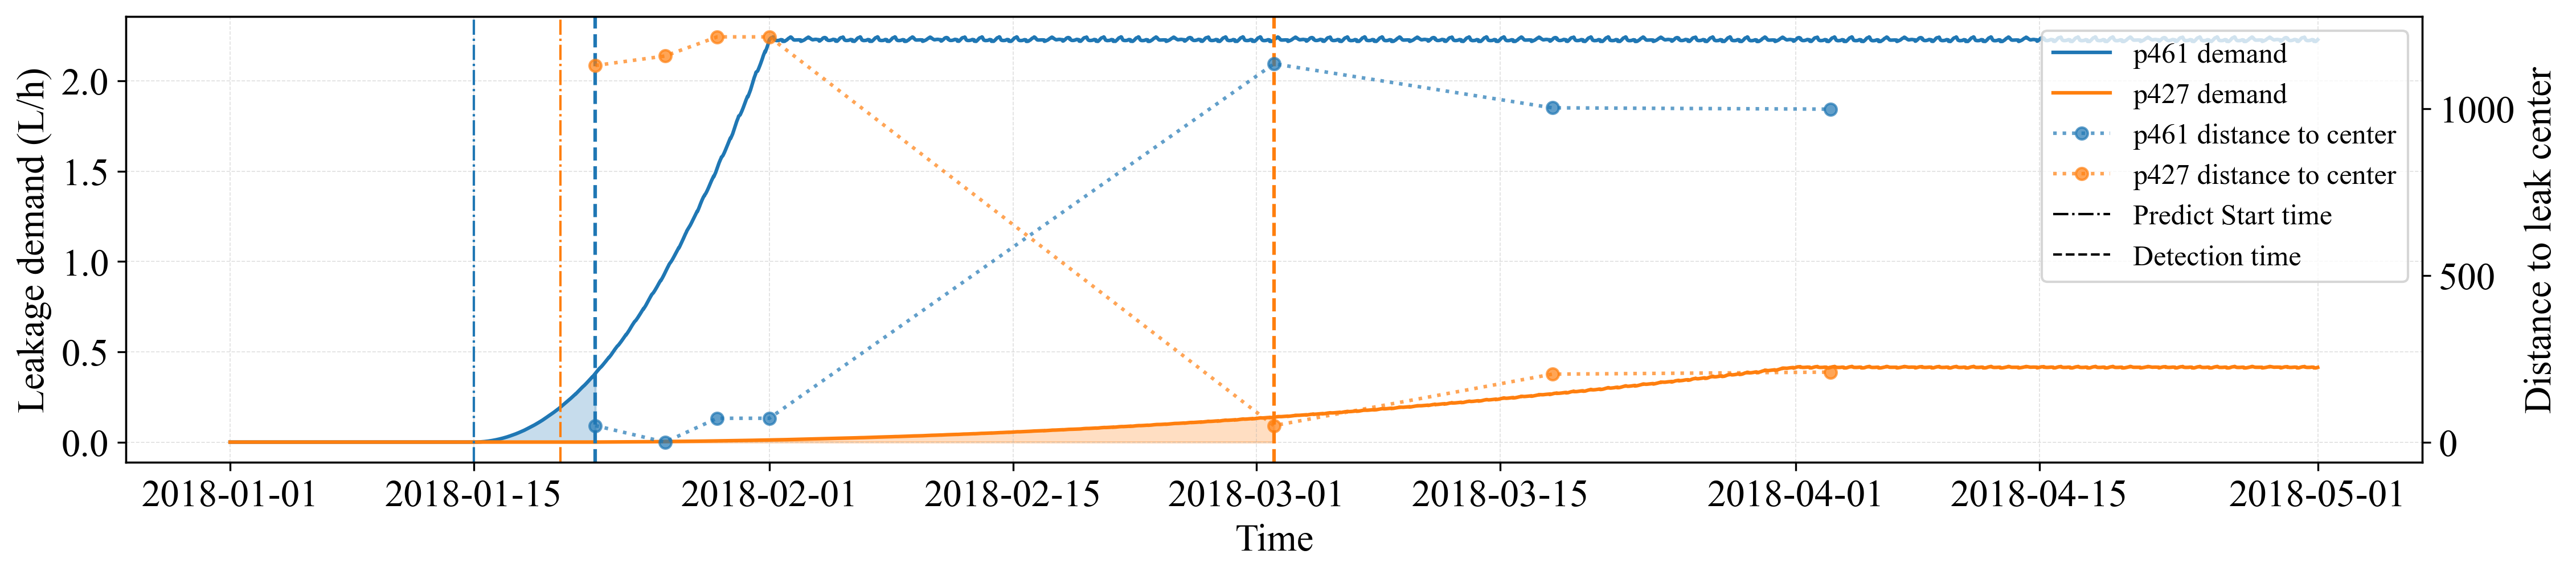

In [26]:
def plot_leak_and_detection_with_distance(ax, leak_data, leak_center_all, detection_correction, pipe_coord, year, title):
    colors = {}
    columns = [col.split("_")[0] for col in leak_data.columns]

    leak_lines = []
    distance_lines = []

    # 绘制泄漏需求曲线
    for column in columns:
        line, = ax.plot(leak_data.index, leak_data[column], label=f'{column} demand', linewidth=1.5)
        colors[column] = line.get_color()
        leak_lines.append(line)

    # 绘制 start_time -> detection_time 阴影及线
    for index in detection_correction.index:
        record = detection_correction.loc[index]
        if pd.to_datetime(record['start_time']).year == year:
            pipe = record['pipe']
            start = pd.to_datetime(record['start_time'])
            detect = pd.to_datetime(record['detection_time'])
            if pipe in columns:
                mask = (leak_data.index >= start) & (leak_data.index <= detect)
                ax.fill_between(leak_data.index[mask], leak_data[pipe][mask],
                                color=colors[pipe], alpha=0.25)
                ax.axvline(start, color=colors[pipe], linestyle='-.', linewidth=1)
                ax.axvline(detect, color=colors[pipe], linestyle='--', linewidth=1.5)

    # 添加右侧 y 轴绘制距离曲线（天步长）
    ax2 = ax.twinx()
    for pipe in columns:
        px, py = pipe_coord.loc[pipe, 'x'], pipe_coord.loc[pipe, 'y']
        distance = np.sqrt((leak_center_all['x_center'] - px)**2 +
                           (leak_center_all['y_center'] - py)**2)
        line2, = ax2.plot(leak_center_all['time'], distance,
                          marker='o', markersize=5,
                          linestyle=':', linewidth=1.5,
                          label=f'{pipe} distance to center', color=colors[pipe], alpha=0.7)
        distance_lines.append(line2)
    ax.set_xlabel('Time')
    ax.set_ylabel("Leakage demand (L/h)")
    ax2.set_ylabel("Distance to leak center")
    # ax.set_title(f"{title}", fontweight="bold")
    ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.4)

    # 构造图例
    start_line = mlines.Line2D([], [], color='black', linestyle='-.', linewidth=1, label='Predict Start time')
    detect_line = mlines.Line2D([], [], color='black', linestyle='--', linewidth=1, label='Detection time')

    # 显示图例：泄漏曲线+距离曲线+标记线
    ax.legend(handles=leak_lines + distance_lines + [start_line, detect_line],
              loc='upper right', fontsize=12, ncol=1)

plt.rcParams.update({'legend.fontsize': 10})
gs = GridSpec(1, 1, height_ratios=[1], hspace=0.3)
fig = plt.figure(figsize=(16, 3), dpi=300)
ax1 = fig.add_subplot(gs[0])
plot_leak_and_detection_with_distance(ax1, leak_demand, leakage_center_AB, detection_correction_AB, pipe_coords, 2018, "Leakage detection & distance (correction)")
fig.subplots_adjust(left=0.08, right=0.92, top=0.95, bottom=0.08)
plt.savefig(f'{FIG_PATH}/DHFC-rectificated.png', dpi=300)
plt.savefig(f'{FIG_PATH}/DHFC-rectificated.pdf', dpi=300)
plt.show()

In [17]:
from experiment import run_no_re_experiment

In [115]:
def run_no_re_experiment(
        DMA,
        fix_pressure,
        inp_file,
        leak_data,
        leak_identification_file="leak_identification",
        leak_location_file="leak_location"
):
        """运行一次实验，返回检测结果"""

        """ 初始化数据 """
        # 区域传感器
        select_sensors = DMA_AB_sensors if DMA == 'AB' else DMA_C_sensors
        # FIS 参数
        fis_params = init_fis_params(DMA)
        # 泄漏点和需求量
        leak_demands = pd.read_csv(os.path.join(File_PATH, "leak_demands.csv"))
        # 水网络模型
        wn = wntr.network.WaterNetworkModel(inp_file)
        # 管道坐标
        pipe_coords = get_coordinate(wn)
        # 泄漏事件
        leak_data = leak_data
        leak_events = pd.DataFrame(leak_data, columns=["linkID", "startTime", "endTime"])
        # 合并坐标
        leak_info = leak_events.join(pipe_coords, on="linkID")
        # 转换时间格式
        leak_info["startTime"] = pd.to_datetime(leak_info["startTime"]).dt.normalize()
        leak_info["endTime"] = pd.to_datetime(leak_info["endTime"]).dt.normalize()

        # 模糊推理泄漏识别
        fis_result, day_result_step, pressure_result = run(fix_pressure, fis_params, sensors=select_sensors)
        leak_flag_times, detection_flag_times = collect_leak_detection_times(fis_result)
        pressure_detection = fix_pressure.resample("D").mean().loc[list(detection_flag_times['time']), select_sensors].astype(
            float)
        # - fis_result: 基于FIS的泄漏识别结果
        # - pressure_result: 修正后的每天传感器压力数据
        # - pressure_detection: 基于FIS的泄漏识别结果中检测到泄漏的传感器压力数据
        # - leak_flag_times: 泄漏事件的起始事件记录
        # - detection_flag_times: 泄漏事件的检测事件和最终起始时间预测
        with open(os.path.join(RESULT_PATH, f"{leak_identification_file}_{DMA}.pickle"), "wb") as f:
            pickle.dump((fis_result, pressure_result, pressure_detection, detection_flag_times), f)
            print(f"区域{DMA} FIS 泄漏识别结果已保存至 {RESULT_PATH}/{leak_identification_file}_{DMA}.pickle")

        # 计算泄漏重心
        center_df = pd.DataFrame(None, index=pressure_detection.index, columns=['x_center', 'y_center', 'pipes'])
        pipe_df = pd.DataFrame(columns=pressure_detection.index)
        for i in pressure_detection.index:
            pi, _, _ = compute_leak_probability(pressure_detection.loc[i])
            pipe_df[i] = pi
            center, S = compute_leakage_center_single(pi, pipe_coords)
            if center is None:
                # 删除该索引行
                center_df.drop(index=i, inplace=True)
                continue
            center_df.loc[i, 'x_center'] = center[0]
            center_df.loc[i, 'y_center'] = center[1]
            center_df.loc[i, 'pipes'] = S
        # 1) 由中心 → 评价表 leakage_center
        leakage_center = get_leakage_center(
            center_df=center_df,
            pipe_coords=pipe_coords,
            leak_info=leak_info,
            distance_thresh=300.0
        )
        # 2) 由 leakage_center + detection_flag_times → 纠错表
        detection_correction, leak_info_remaining = generate_detection_correction(
            leakage_center=leakage_center,
            leak_info=leak_info,
        )
        # 3) 计算纠错表格的经济值
        economic_value = calculate_economic_value(
            detection_correction=detection_correction,
            leakage_center=leakage_center,
            leak_info=leak_info,
            leak_demands=leak_demands
        )

        with open(os.path.join(RESULT_PATH, f"{leak_location_file}_{DMA}.pickle"), "wb") as f:
            pickle.dump((pipe_df, center_df, leakage_center, detection_correction, economic_value), f)
            print(f"区域{DMA} FIS 泄漏位置结果已保存至 {RESULT_PATH}/{leak_location_file}_{DMA}.pickle")


In [116]:
run_no_re_experiment(
        DMA="AB",
        fix_pressure=fix_pressure,
        inp_file=inp_file,
        leak_data=leak_data,
        leak_identification_file = "reset_no_identification",
        leak_location_file = "reset_no_location"
)

区域AB FIS 泄漏识别结果已保存至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/reset_no_identification_AB.pickle
区域AB FIS 泄漏位置结果已保存至 F:\CX_notes\Project_Team\研究生培养\供水管网分区\研二上\Experiment\BattLeDIM\Experiment\result/reset_no_location_AB.pickle


In [117]:
with open(os.path.join(RESULT_PATH, f"reset_no_identification_AB.pickle"), 'rb') as f:
    fis_result_reset, pressure_result_reset, pressure_detection_reset, detection_flag_times_reset = pickle.load(f)
with open(os.path.join(RESULT_PATH, f"reset_no_location_AB.pickle"), 'rb') as f:
    pi_df, center_df_reset, leakage_center_reset, detection_correction_reset, economic_value_reset = pickle.load(f)

In [27]:
def plot_pipe_detection(leak_pipe, pipe_values, time, leakage_center, title):
    wn = wntr.network.WaterNetworkModel(f'{DATA_PATH}/L-TOWN_v2_model.inp')

    # 选取前300个管道
    pipe_value = pipe_values[time]
    pipe_value = pipe_value[pipe_value>0]
    pipe_value = (pipe_value- pipe_value.min()) / (pipe_value.max() - pipe_value.min())

    # 使用 colormap（这里用 coolwarm 或 viridis 比较明显）
    cmap = cm.get_cmap('coolwarm')

    # 管道属性
    link_attr = pipe_value.to_dict()
    leak_link = wn.get_link(leak_pipe)
    index = leakage_center[leakage_center['time']==time].index[0]
    leak_center = wn.get_link(leakage_center.loc[index, 'min_pipe'])
    leak_link_node = leak_link.start_node
    leak_center_node = leak_center.start_node

    # 节点属性
    node_attr = {}
    node_attr[leak_link_node.name] = 1
    node_attr[leak_center_node.name] = 2

    # 绘图
    fig, ax = plt.subplots(figsize=(8, 6), dpi=200)
    wntr.graphics.plot_network(
        wn=wn,
        link_attribute=link_attr,
        link_cmap=cmap,
        link_width=2,
        node_size=5,
        node_alpha=0.3,
        add_colorbar=False,
        link_colorbar_label='Leak Probability',
        node_colorbar_label='Leak pipe & Leak center',
        ax=ax,
        show_plot=False
    )
    # ax.set_title(f"{title}", fontweight='bold')

    # === 手动添加泄漏管道和泄漏重心标记 ===
    leak_pos = [leak_link.start_node.coordinates[0], leak_link.start_node.coordinates[1]]
    center_pos = [leak_center.start_node.coordinates[0], leak_center.start_node.coordinates[1]]

    leak_point = ax.scatter(*leak_pos, color='tab:orange', s=100, marker='*', zorder=5)
    center_point = ax.scatter(*center_pos, color='tab:red', s=100, marker='^', zorder=5)

    # === 7. 添加标注文字 ===
    # ax.text(leak_pos[0] + 30, leak_pos[1] + 30, 'True Leak', color='tab:orange', fontsize=9, weight='bold')
    # ax.text(center_pos[0] + 30, center_pos[1] + 30, 'Detected Center', color='tab:red', fontsize=9, weight='bold')

    # === 8. 添加自定义图例 ===
    leak_handle = mlines.Line2D([], [], color='tab:orange', marker='*', linestyle='None',
                                markersize=10, label='True Leak Pipe')
    center_handle = mlines.Line2D([], [], color='tab:red', marker='^', linestyle='None',
                                  markersize=10, label='Detected Leak Center')

    ax.legend(handles=[leak_handle, center_handle],
              loc='upper right', fontsize=12, frameon=True, facecolor='white',
              borderaxespad=0.5, handletextpad=0.4)

    plt.savefig(f'{FIG_PATH}/{title}.png', dpi=300)
    plt.savefig(f'{FIG_PATH}/{title}.pdf', dpi=300)
    plt.tight_layout()
    plt.show()

C:\Users\xiang\AppData\Local\Temp\ipykernel_14916\4118884392.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


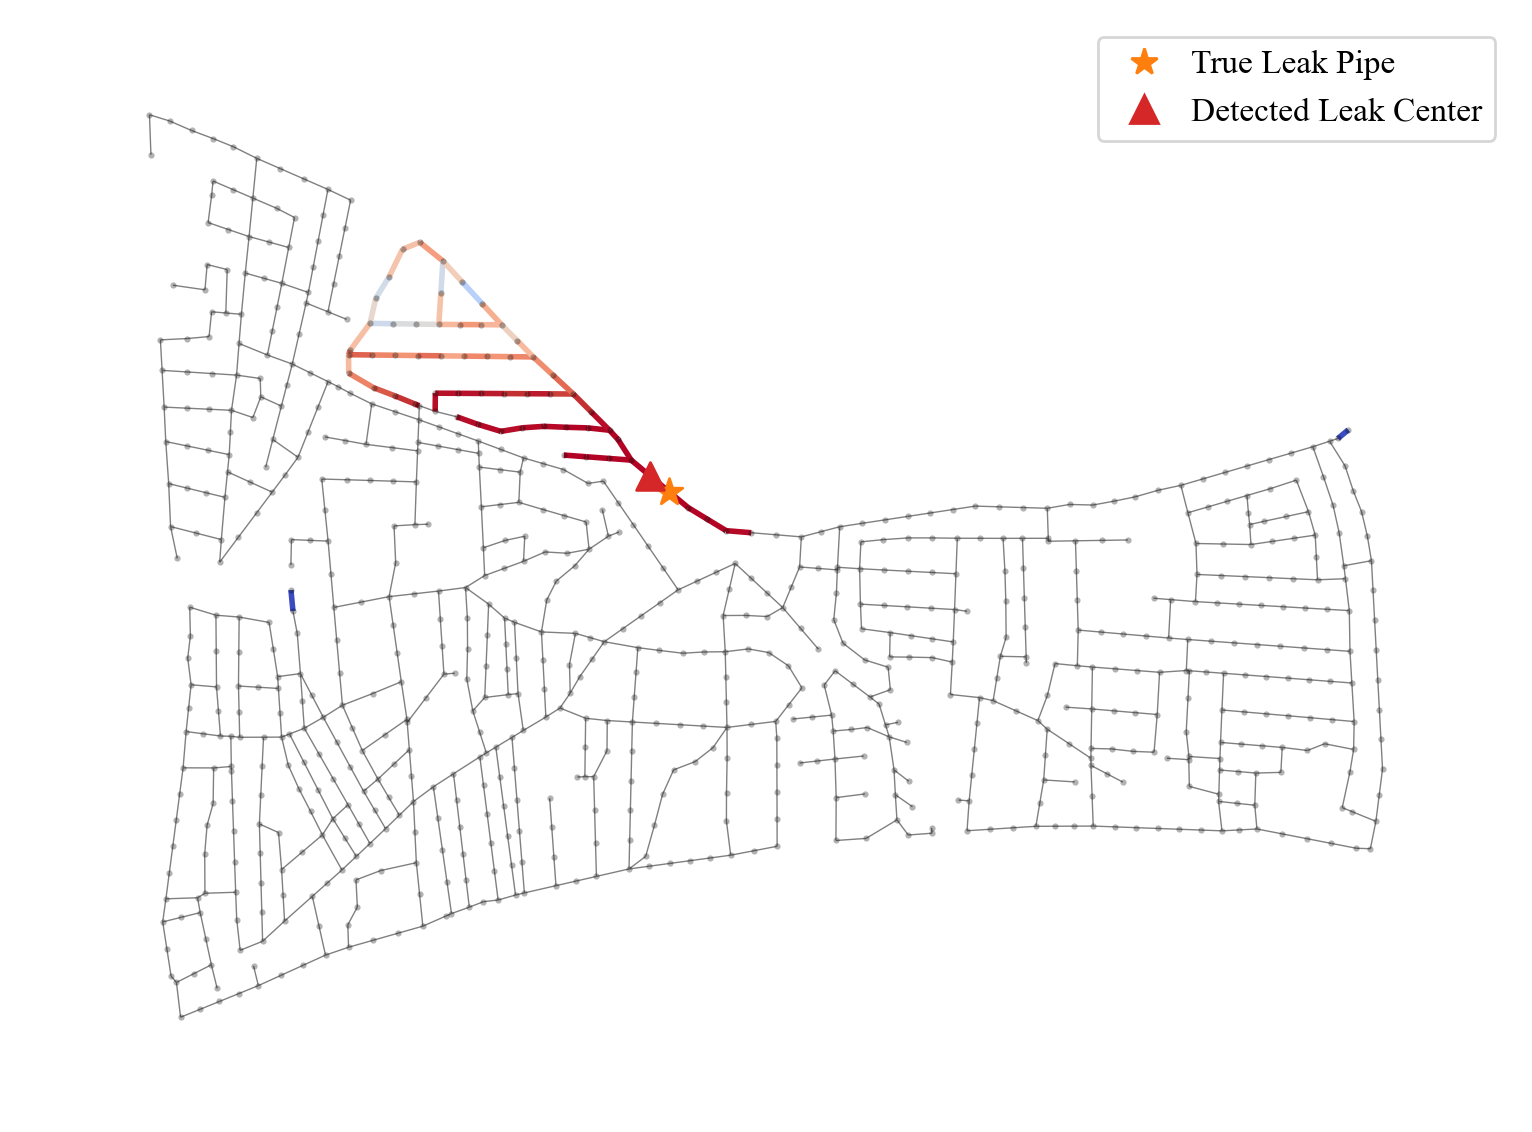

In [28]:
# === 调用示例 ===
plot_pipe_detection(
    detection_correction_AB.loc[1, 'pipe'],
    pi_df,
    detection_correction_AB.loc[1, 'detection_time'],
    leakage_center_AB,
    "pipe_leak_location2",
)

In [ ]:
# === 调用示例 ===
plot_pipe_detection(
    detection_correction_AB.loc[1, 'pipe'],
    pi_df,
    detection_correction_AB.loc[1, 'detection_time'],
    leakage_center_reset,
    "pipe_leak_location",
)

In [144]:
# SFLI模块
with open(os.path.join(RESULT_PATH, f"leak_identification_AB.pickle"), 'rb') as f:
    fis_result_fuzzy, pressure_result_fuzzy, pressure_detection_fuzzy, detection_flag_times_fuzzy = pickle.load(f)
with open(os.path.join(RESULT_PATH, f"no_fis_leak_identification_AB.pickle"), 'rb') as f:
    fis_result_no_fuzzy, pressure_result_no_fuzzy, pressure_detection_no_fuzzy, detection_flag_times_no_fuzzy = pickle.load(f)
with open(os.path.join(RESULT_PATH, f"leak_location_AB.pickle"), 'rb') as f:
    center_df_fuzzy, leakage_center_fuzzy, detection_correction_fuzzy, economic_value_fuzzy = pickle.load(f)
with open(os.path.join(RESULT_PATH, f"no_fis_leak_location_AB.pickle"), 'rb') as f:
    center_df_no_fuzzy, leakage_center_no_fuzzy, detection_correction_no_fuzzy, economic_value_no_fuzzy = pickle.load(f)

In [135]:
with open(f"{File_PATH}/fix_pressure.pickle", "rb") as f:
    fix_pressure = pickle.load(f)

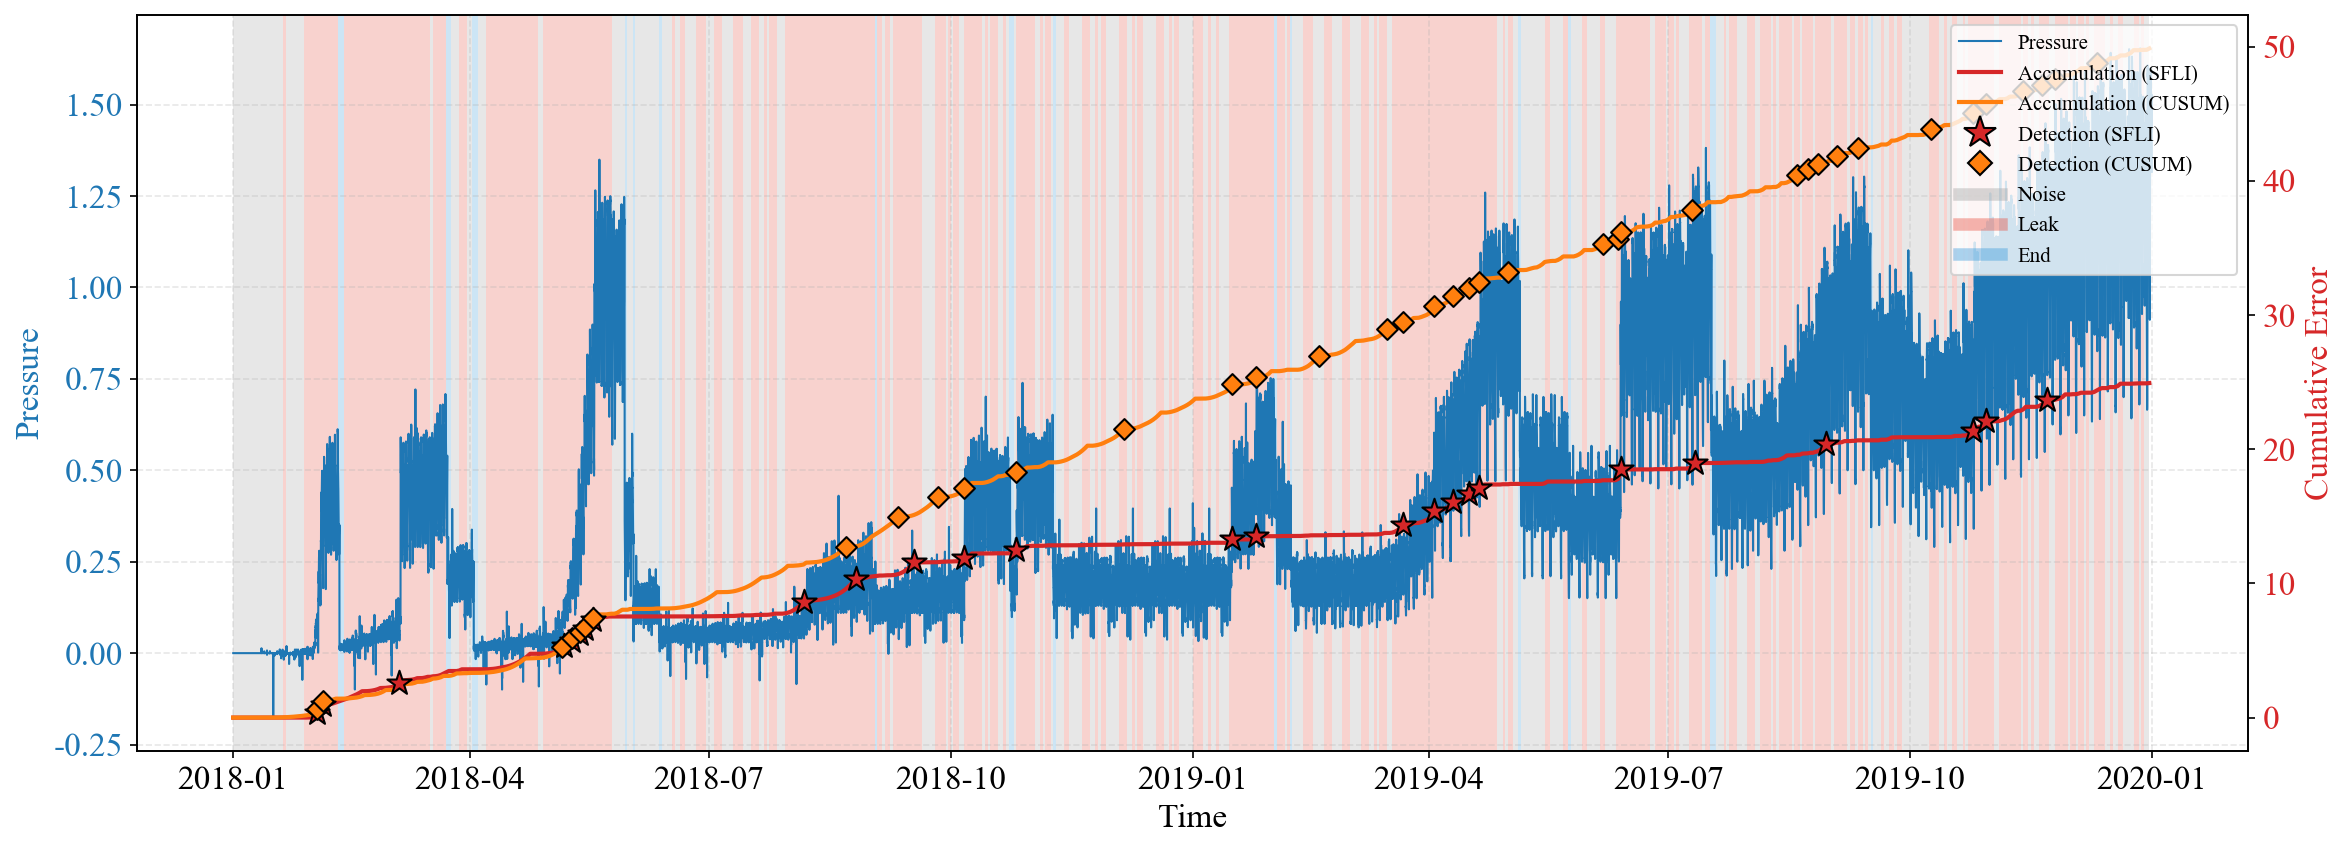

In [143]:
def plot_pressure_with_states(pressures, fis_results, fis_result_nofuzzys, col, title='Leakage Detection Timeline'):
    """
    绘制：
      - 压力曲线（左 y 轴，分钟级）
      - 累积误差曲线（右 y 轴，天级）
      - 模糊推理状态条带
      - 检测点（两种算法）
    """
    # === 颜色映射 ===
    state_colors = {
        'Noise': '#A0A0A0',   # 灰色
        'Leak': '#E74C3C',    # 红色
        'End': '#3498DB'      # 蓝色
    }

    pressure = pressures[col]
    fis_result = fis_results[col]
    fis_result_nofuzzy = fis_result_nofuzzys[col]

    fig, ax1 = plt.subplots(figsize=(16, 6), dpi=150)
    ax2 = ax1.twinx()  # 第二纵坐标

    # === 压力曲线（左轴） ===
    ax1.plot(pressure.index, pressure.values, color='tab:blue', linewidth=1, label='Pressure')
    ax1.set_ylabel('Pressure', color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')
    ax1.set_xlabel('Time')
    ax1.grid(True, linestyle='--', alpha=0.3)

    # === 状态条带 ===
    for i in range(len(fis_result) - 1):
        t0 = fis_result.index[i]
        t1 = fis_result.index[i + 1]
        state = fis_result['State'].iloc[i]
        color = state_colors.get(state, '#CCCCCC')
        ax1.axvspan(t0, t1, color=color, alpha=0.25, lw=0, zorder=0)

    # === 累计误差曲线（右轴） ===
    cusum = fis_result['leak_cum'].cumsum()
    cusum_nofuzzy = fis_result_nofuzzy['leak_cum'].cumsum()

    ax2.plot(cusum.index, cusum.values, color='tab:red', linestyle='-', linewidth=2, label='Accumulation (MTD-FI)')
    ax2.plot(cusum_nofuzzy.index, cusum_nofuzzy.values, color='tab:orange', linestyle='-', linewidth=2, label='Accumulation (CUSUM)')
    ax2.set_ylabel('Cumulative Error', color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    # === 检测点标注（不再画竖线） ===
    detection_days = fis_result.index[fis_result['detection_flag'] == True]
    detection_days_nofuzzy = fis_result_nofuzzy.index[fis_result_nofuzzy['detection_flag'] == True]

    # MTD-FI 检测点
    for t in detection_days:
        if t in cusum.index:
            ax2.scatter(t, cusum.loc[t], color='tab:red', s=150, marker='*', edgecolors='black', zorder=5)

    # CUSUM 检测点
    for t in detection_days_nofuzzy:
        if t in cusum_nofuzzy.index:
            ax2.scatter(t, cusum_nofuzzy.loc[t], color='tab:orange', s=50, marker='D', edgecolors='black', zorder=5)


    # === 图例 ===
    handles = [
        plt.Line2D([0], [0], color='tab:blue', lw=1, label='Pressure'),
        plt.Line2D([0], [0], color='tab:red', lw=2, linestyle='-', label='Accumulation (SFLI)'),
        plt.Line2D([0], [0], color='tab:orange', lw=2, linestyle='-', label='Accumulation (CUSUM)'),
        plt.Line2D([0], [0], marker='*', color='tab:red', lw=0, markersize=16, label='Detection (SFLI)', markeredgecolor='black'),
        plt.Line2D([0], [0], marker='D', color='tab:orange', lw=0, markersize=8, label='Detection (CUSUM)', markeredgecolor='black')
    ]
    for state, c in state_colors.items():
        handles.append(plt.Line2D([0], [0], color=c, lw=6, alpha=0.4, label=state))
    ax2.legend(handles=handles, loc='upper right')

    # === 时间格式化 ===
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)
    plt.tight_layout()

    plt.savefig(f'{FIG_PATH}/{title}.png', dpi=300, bbox_inches='tight')
    plt.savefig(f'{FIG_PATH}/{title}.pdf', dpi=300, bbox_inches='tight')
    plt.show()
for col in ['n613']:
    plot_pressure_with_states(fix_pressure, fis_result_fuzzy, fis_result_no_fuzzy, col, f'SFLI')

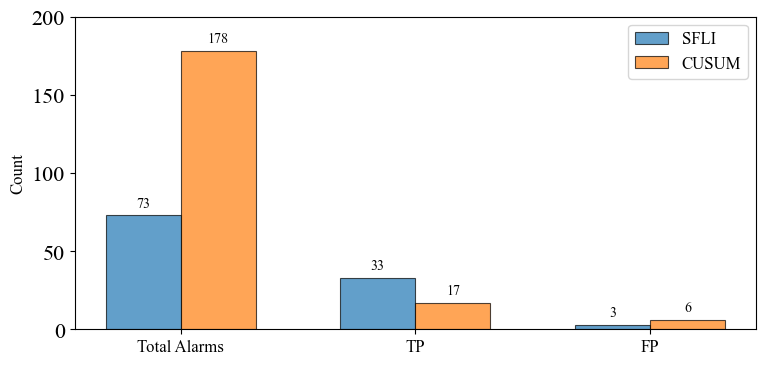

In [176]:

fuzz_stats = {
    "N_alarm": len(leakage_center['']['AB']) + len(leakage_center['']['C']),
    "N_TP": economic_value['']['ABC']['tp'],
    "N_FP": economic_value['']['ABC']['fp'],
}

no_fuzz_stats = {
    "N_alarm": len(leakage_center['no_fis_']['AB']) + len(leakage_center['no_fis_']['C']),
    "N_TP": economic_value['no_fis_']['ABC']['tp'],
    "N_FP": economic_value['no_fis_']['ABC']['fp'],
}


# ===== 画对比图 =====

# ---------------------------
# 数据
# ---------------------------
methods = ["SFLI", "CUSUM"]
metrics = ["Total Alarms", "TP", "FP"]

fuzz_values    = [fuzz_stats["N_alarm"],    fuzz_stats["N_TP"],    fuzz_stats["N_FP"]]
no_fuzz_values = [no_fuzz_stats["N_alarm"], no_fuzz_stats["N_TP"], no_fuzz_stats["N_FP"]]

x = np.arange(len(metrics))
width = 0.32

# ---------------------------
# 绘图
# ---------------------------
fig, ax = plt.subplots(figsize=(8, 4))

bars1 = ax.bar(x - width/2, fuzz_values, width,
               label="SFLI", edgecolor="black", linewidth=0.8, alpha=0.7)
bars2 = ax.bar(x + width/2, no_fuzz_values, width,
               label="CUSUM", edgecolor="black", linewidth=0.8, alpha=0.7)

# ---------------------------
# 数值标签
# ---------------------------
def add_bar_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2,
            height + 0.02 * max(fuzz_values + no_fuzz_values),  # 偏移量
            f"{height}",
            ha='center', va='bottom', fontsize=10
        )

add_bar_labels(bars1)
add_bar_labels(bars2)

# ---------------------------
# 坐标轴设置
# ---------------------------
ax.set_ylabel("Count", fontsize=12)
ax.set_xticks(x)
ax.set_ylim(0,200)
ax.set_xticklabels(metrics, fontsize=12)
ax.legend(fontsize=12)
plt.tight_layout()
plt.savefig(f"{FIG_PATH}/SFLI_results.png", dpi=300)
plt.savefig(f"{FIG_PATH}/SFLI_results.pdf", dpi=300)
plt.show()

In [184]:
array = np.array([[
    economic_value['no_cor_']['ABC']['S'], economic_value['no_re_']['ABC']['S'], economic_value['no_fis_']['ABC']['S'], economic_value['']['ABC']['S']],
    [economic_value['no_cor_']['ABC']['tp'] / economic_value['no_cor_']['ABC']['total'], economic_value['no_re_']['ABC']['tp'] / economic_value['no_re_']['ABC']['total'], economic_value['no_fis_']['ABC']['tp'] / economic_value['no_fis_']['ABC']['total'], economic_value['']['ABC']['tp'] / economic_value['']['ABC']['total']],
    [economic_value['no_cor_']['ABC']['fp'], economic_value['no_re_']['ABC']['fp'], economic_value['no_fis_']['ABC']['fp'], economic_value['']['ABC']['fp']],
])
data_df = pd.DataFrame(array, columns=['No DHFC-corrected', 'No DHFC-rectificated', 'No SFLI', 'RFLOMA'],index=['ES','TPR','FP'])


In [187]:
data_df.to_csv(os.path.join(RESULT_PATH, "ablation.csv"), index=False)

# 迁移实验

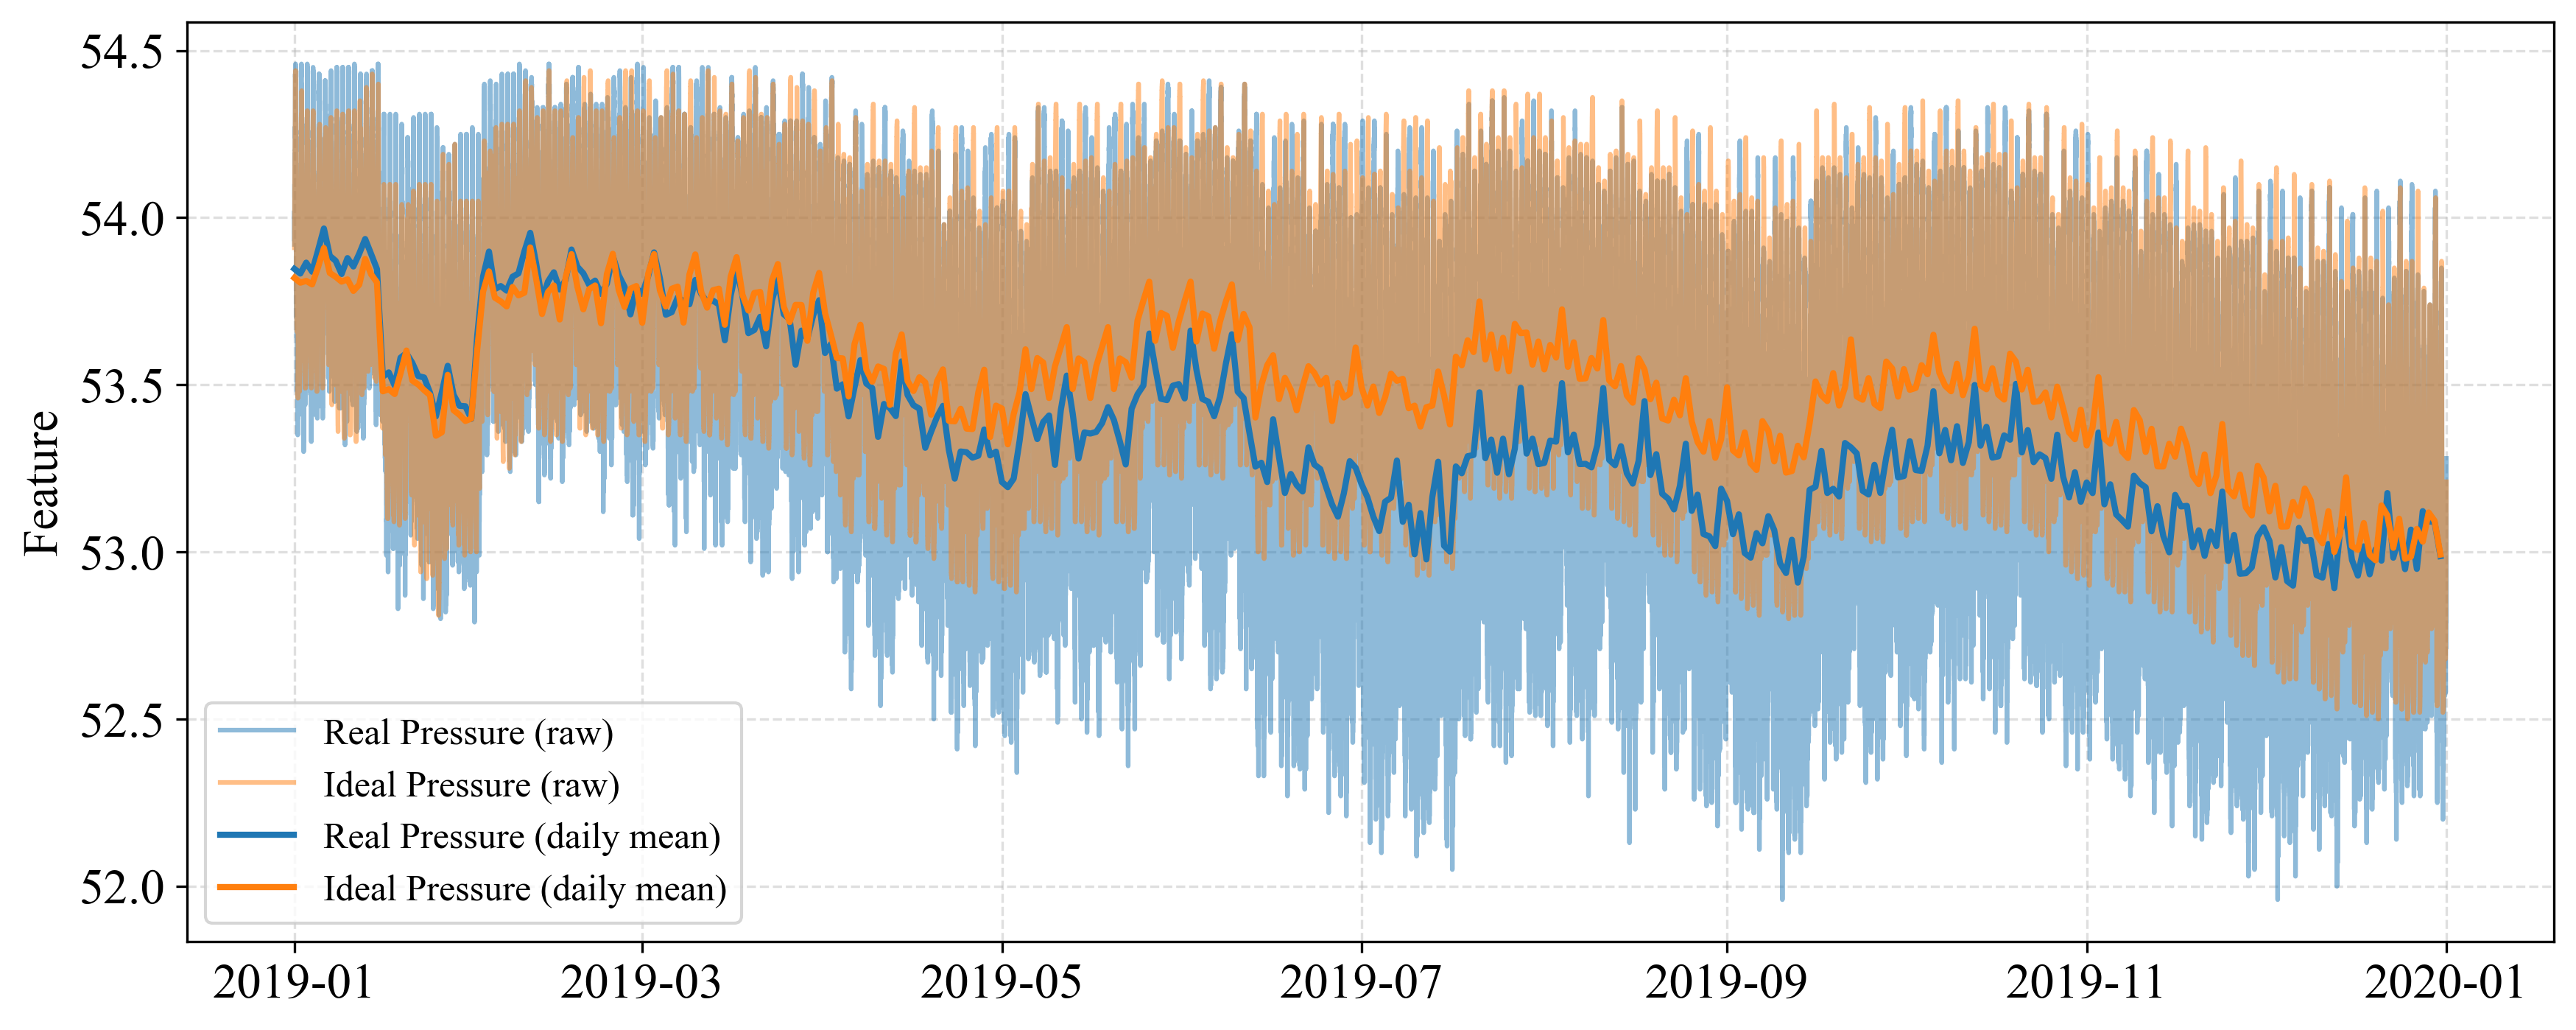

In [208]:
def plot_real_pressure():
    sensor = 'n114'

    with open(f"{File_PATH}/real_dataset_2019.pickle", 'rb') as f:
        real_dataset_2019 = pickle.load(f)
        real_pressure = real_dataset_2019["Pressures (m)"]
    with open(f"{File_PATH}/leak_dataset_2019.pickle", 'rb') as f:
        leak_dataset_2019 = pickle.load(f)
        leak_pressure = leak_dataset_2019["Pressures (m)"]

    real_pressure.set_index('Timestamp', inplace=True)
    real_pressure.index = pd.to_datetime(real_pressure.index)
    leak_pressure.index = pd.to_datetime(leak_pressure.index)
    pressure_real = real_pressure[sensor]
    pressure_ideal = leak_pressure[sensor]

    # 日均值
    pressure_real_daily = pressure_real.resample("D").mean()
    pressure_ideal_daily = pressure_ideal.resample("D").mean()

    plt.figure(figsize=(12, 5), dpi=300)

    # 绘制四条曲线
    plt.plot(pressure_real.index, pressure_real.values, label='Real Pressure (raw)', color='tab:blue', alpha=0.5)
    plt.plot(pressure_ideal.index, pressure_ideal.values, label='Ideal Pressure (raw)', color='tab:orange', alpha=0.5)
    plt.plot(pressure_real_daily.index, pressure_real_daily.values, label='Real Pressure (daily mean)', color='tab:blue', linewidth=2)
    plt.plot(pressure_ideal_daily.index, pressure_ideal_daily.values, label='Ideal Pressure (daily mean)', color='tab:orange', linewidth=2)

    # plt.xlabel('Time')
    plt.ylabel('Feature')
    # plt.title(f'Sensor {sensor} Pressure Comparison: Original vs RHFC-corrected', fontweight='bold')
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(fontsize=12,)
    plt.tight_layout()
    plt.savefig(f'{FIG_PATH}/real_pressure.png', dpi=300)
    plt.savefig(f'{FIG_PATH}/real_pressure.pdf', dpi=300)
    plt.show()
plot_real_pressure()


In [259]:
array = np.array([[
    economic_value['']['ABC']['S'], economic_value['real_']['ABC']['S']],
    [economic_value['']['ABC']['tp'] / economic_value['']['ABC']['total'], economic_value['real_']['ABC']['tp'] / economic_value['real_']['ABC']['total']],
    [economic_value['']['ABC']['fp'], economic_value['real_']['ABC']['fp']],
])
data_df = pd.DataFrame(array, columns=['Ideal Model', 'Real Model'],index=['ES','TPR','FP'])


In [266]:
data_df.to_csv(os.path.join(RESULT_PATH, "transform.csv"), index=False)

In [256]:
# 定位结果表格
leak_data = [
    ["p257", "2018-01-08 13:30", "2019-12-31 23:55"],
    ["p461", "2018-01-23 04:25", "2018-04-02 11:40"],
    ["p232", "2018-01-31 02:35", "2018-02-10 09:20"],
    ["p427", "2018-02-13 08:25", "2019-12-31 23:55"],
    ["p673", "2018-03-05 15:45", "2018-03-23 10:25"],
    ["p810", "2018-07-28 03:05", "2019-12-31 23:55"],
    ["p628", "2018-05-02 14:55", "2018-05-29 21:20"],
    ["p538", "2018-05-18 08:35", "2018-06-02 06:05"],
    ["p866", "2018-06-01 09:05", "2018-06-12 03:00"],
    ["p31", "2018-06-28 10:35", "2018-08-12 17:30"],
    ["p654", "2018-07-05 03:40", "2019-12-31 23:55"],
    ["p183", "2018-08-07 02:35", "2018-09-01 17:10"],
    ["p158", "2018-10-06 02:35", "2018-10-23 13:35"],
    ["p369", "2018-10-26 02:05", "2018-11-08 20:25"],
    ["p523", "2019-01-15 23:00", "2019-02-01 09:50"],
    ["p827", "2019-01-24 18:30", "2019-02-07 09:05"],
    ["p280", "2019-02-10 13:05", "2019-12-31 23:55"],
    ["p653", "2019-03-03 13:10", "2019-05-05 12:10"],
    ["p710", "2019-03-24 14:15", "2019-12-31 23:55"],
    ["p514", "2019-04-02 20:40", "2019-05-23 14:55"],
    ["p331", "2019-04-20 10:10", "2019-12-31 23:55"],
    ["p193", "2019-05-19 10:40", "2019-12-31 23:55"],
    ["p277", "2019-05-30 21:55", "2019-12-31 23:55"],
    ["p142", "2019-06-12 19:55", "2019-07-17 09:25"],
    ["p680", "2019-07-10 08:45", "2019-12-31 23:55"],
    ["p586", "2019-07-26 14:40", "2019-09-16 03:20"],
    ["p721", "2019-08-02 03:00", "2019-12-31 23:55"],
    ["p800", "2019-08-16 14:00", "2019-10-01 16:35"],
    ["p123", "2019-09-13 20:05", "2019-12-31 23:55"],
    ["p455", "2019-10-03 14:00", "2019-12-31 23:55"],
    ["p762", "2019-10-09 10:15", "2019-12-31 23:55"],
    ["p426", "2019-10-25 13:25", "2019-12-31 23:55"],
    ["p879", "2019-11-20 11:55", "2019-12-31 23:55"],
]

method = 'real_'
leak_data = leak_data
leak_events = pd.DataFrame(leak_data, columns=["linkID", "startTime", "endTime"])

detection_correction_real = {
    "AB": detection_correction['real_']['AB'],
    "C": detection_correction['real_']['C'],
}
leakage_center_real = {
    "AB": leakage_center['real_']['AB'],
    "C": leakage_center['real_']['C']
}

# 绘制检测定位结果表格
def plot_detection_table():
    detection_table = pd.DataFrame(columns=['Leak Pipe', 'Start Time', 'End Time', 'Leakage Center', 'Detection Time', 'Distance'])
    for item in detection_correction_real:
        for index in detection_correction_real[item].index:
            record = detection_correction_real[item].loc[index]
            pipe = record['pipe']
            if pd.isna(pipe):
                continue
            leak = leak_events.set_index('linkID').loc[pipe]

            start = leak['startTime']
            end = leak['endTime']
            detect = record['detection_time']
            leak_center = leakage_center_real[item].loc[detect]
            distance = record['distance']
            center = (int(leak_center['x_center']), int(leak_center['y_center']))
            detect = pd.to_datetime(detect).replace(second=0, microsecond=0)
            # yy-mm-dd hh:mm 格式
            detect = pd.to_datetime(detect.normalize() + pd.Timedelta(hours=23, minutes=59)).strftime('%Y-%m-%d %H:%M')
            detection_table.loc[len(detection_table)] = [
                    pipe, start, end, center, detect, distance
                ]
    detection_table.sort_values(by=['Start Time'], inplace=True)
    detection_table.to_csv(f"{FIG_PATH}/detection_table_real.csv", index=False)
    return detection_table
plot_detection_table()

Leak Pipe        Start Time          End Time Leakage Center  \
29      p257  2018-01-08 13:30  2019-12-31 23:55    (273, 1576)   
1       p461  2018-01-23 04:25  2018-04-02 11:40     (322, 316)   
0       p232  2018-01-31 02:35  2018-02-10 09:20    (1102, 685)   
3       p427  2018-02-13 08:25  2019-12-31 23:55    (1029, 994)   
2       p673  2018-03-05 15:45  2018-03-23 10:25    (1621, 644)   
4       p628  2018-05-02 14:55  2018-05-29 21:20    (1096, 403)   
5       p538  2018-05-18 08:35  2018-06-02 06:05     (507, 294)   
6       p866  2018-06-01 09:05  2018-06-12 03:00    (2691, 842)   
7        p31  2018-06-28 10:35  2018-08-12 17:30    (631, 1103)   
30       p31  2018-06-28 10:35  2018-08-12 17:30    (430, 1083)   
16      p654  2018-07-05 03:40  2019-12-31 23:55    (1481, 530)   
8       p810  2018-07-28 03:05  2019-12-31 23:55    (2487, 633)   
9       p183  2018-08-07 02:35  2018-09-01 17:10    (2487, 633)   
10      p158  2018-10-06 02:35  2018-10-23 13:35    (1907, 817)   
11      p369  2018-10-26 02:05  2018-11-08 20:25    (937, 1141)   
12      p523  2019-01-15 23:00  2019-02-01 09:50     (446, 343)   
13      p827  2019-01-24 18:30  2019-02-07 09:05    (2688, 706)   
31      p280  2019-02-10 13:05  2019-12-31 23:55    (240, 1035)   
17      p653  2019-03-03 13:10  2019-05-05 12:10    (1481, 530)   
14      p710  2019-03-24 14:15  2019-12-31 23:55    (1692, 786)   
15      p514  2019-04-02 20:40  2019-05-23 14:55     (619, 473)   
18      p331  2019-04-20 10:10  2019-12-31 23:55    (847, 1197)   
20      p193  2019-05-19 10:40  2019-12-31 23:55    (2761, 489)   
32      p277  2019-05-30 21:55  2019-12-31 23:55    (320, 1561)   
19      p142  2019-06-12 19:55  2019-07-17 09:25    (1140, 507)   
21      p680  2019-07-10 08:45  2019-12-31 23:55    (1641, 832)   
22      p586  2019-07-26 14:40  2019-09-16 03:20     (579, 250)   
26      p721  2019-08-02 03:00  2019-12-31 23:55    (1953, 630)   
23      p800  2019-08-16 14:00  2019-10-01 16:35    (2401, 961)   
24      p123  2019-09-13 20:05  2019-12-31 23:55    (1082, 995)   
27      p762  2019-10-09 10:15  2019-12-31 23:55    (1953, 630)   
25      p426  2019-10-25 13:25  2019-12-31 23:55    (1293, 960)   
28      p879  2019-11-20 11:55  2019-12-31 23:55    (2816, 780)   

      Detection Time      Distance  
29  2018-01-22 23:59  2.393272e+01  
1   2018-02-18 23:59  1.202748e+02  
0   2018-02-02 23:59  7.122026e+01  
3   2018-04-18 23:59  2.663404e+02  
2   2018-03-05 23:59  3.679583e+01  
4   2018-05-09 23:59  5.998413e+01  
5   2018-05-18 23:59  3.942827e+01  
6   2018-06-01 23:59  1.136868e-13  
7   2018-07-31 23:59  2.855327e+02  
30  2018-07-20 23:59  1.344151e+02  
16  2019-04-08 23:59  2.520344e+02  
8   2018-08-07 23:59  2.479723e+02  
9   2018-08-07 23:59  1.989520e+00  
10  2018-10-06 23:59  1.628827e+01  
11  2018-10-26 23:59  3.182360e-03  
12  2019-01-16 23:59  4.220661e+01  
13  2019-01-25 23:59  0.000000e+00  
31  2019-02-17 23:59  9.248434e+01  
17  2019-04-08 23:59  2.928604e+02  
14  2019-03-25 23:59  2.133944e+02  
15  2019-04-03 23:59  7.975762e+01  
18  2019-04-21 23:59  5.276254e+01  
20  2019-07-05 23:59  2.558753e+01  
32  2019-07-17 23:59  1.918256e+02  
19  2019-06-13 23:59  7.820327e+01  
21  2019-07-10 23:59  2.830647e+02  
22  2019-08-08 23:59  1.567477e+02  
26  2019-11-15 23:59  1.870071e+02  
23  2019-08-30 23:59  1.391063e+02  
24  2019-10-24 23:59  2.927817e+02  
27  2019-11-15 23:59  1.397264e+02  
25  2019-10-26 23:59  4.943527e+01  
28  2019-12-25 23:59  0.000000e+00

# 方法对比

In [30]:
detection_correction['real_']['AB']

detection_time start_time  pipe      distance
0      2018-01-29        NaT   NaN           NaN
1      2018-02-02 2018-01-31  p232  7.122026e+01
2      2018-02-18 2018-01-23  p461  1.202748e+02
3      2018-03-05 2018-03-05  p673  3.679583e+01
4      2018-04-18 2018-02-13  p427  2.663404e+02
5      2018-05-06        NaT   NaN           NaN
6      2018-05-09 2018-05-02  p628  5.998413e+01
7      2018-05-18 2018-05-18  p538  3.942827e+01
8      2018-06-01 2018-06-01  p866  1.136868e-13
9      2018-06-23        NaT   NaN           NaN
10     2018-07-23        NaT   NaN           NaN
11     2018-07-31 2018-06-28   p31  2.855327e+02
12     2018-08-07 2018-07-28  p810  2.479723e+02
13     2018-08-07 2018-08-07  p183  1.989520e+00
14     2018-10-06 2018-10-06  p158  1.628827e+01
15     2018-10-26 2018-10-26  p369  3.182360e-03
16     2019-01-14        NaT   NaN           NaN
17     2019-01-16 2019-01-15  p523  4.220661e+01
18     2019-01-25 2019-01-24  p827  0.000000e+00
19     2019-03-25 2019-03-24  p710  2.133944e+02
20     2019-04-03 2019-04-02  p514  7.975762e+01
21     2019-04-08 2018-07-05  p654  2.520344e+02
22     2019-04-08 2019-03-03  p653  2.928604e+02
23     2019-04-13        NaT   NaN           NaN
24     2019-04-21 2019-04-20  p331  5.276254e+01
25     2019-06-07        NaT   NaN           NaN
26     2019-06-13 2019-06-12  p142  7.820327e+01
27     2019-07-05 2019-05-19  p193  2.558753e+01
28     2019-07-10 2019-07-10  p680  2.830647e+02
29     2019-08-08 2019-07-26  p586  1.567477e+02
30     2019-08-30 2019-08-16  p800  1.391063e+02
31     2019-10-24 2019-09-13  p123  2.927817e+02
32     2019-10-26 2019-10-25  p426  4.943527e+01
33     2019-11-15 2019-08-02  p721  1.870071e+02
34     2019-11-15 2019-10-09  p762  1.397264e+02
35     2019-12-25 2019-11-20  p879  0.000000e+00

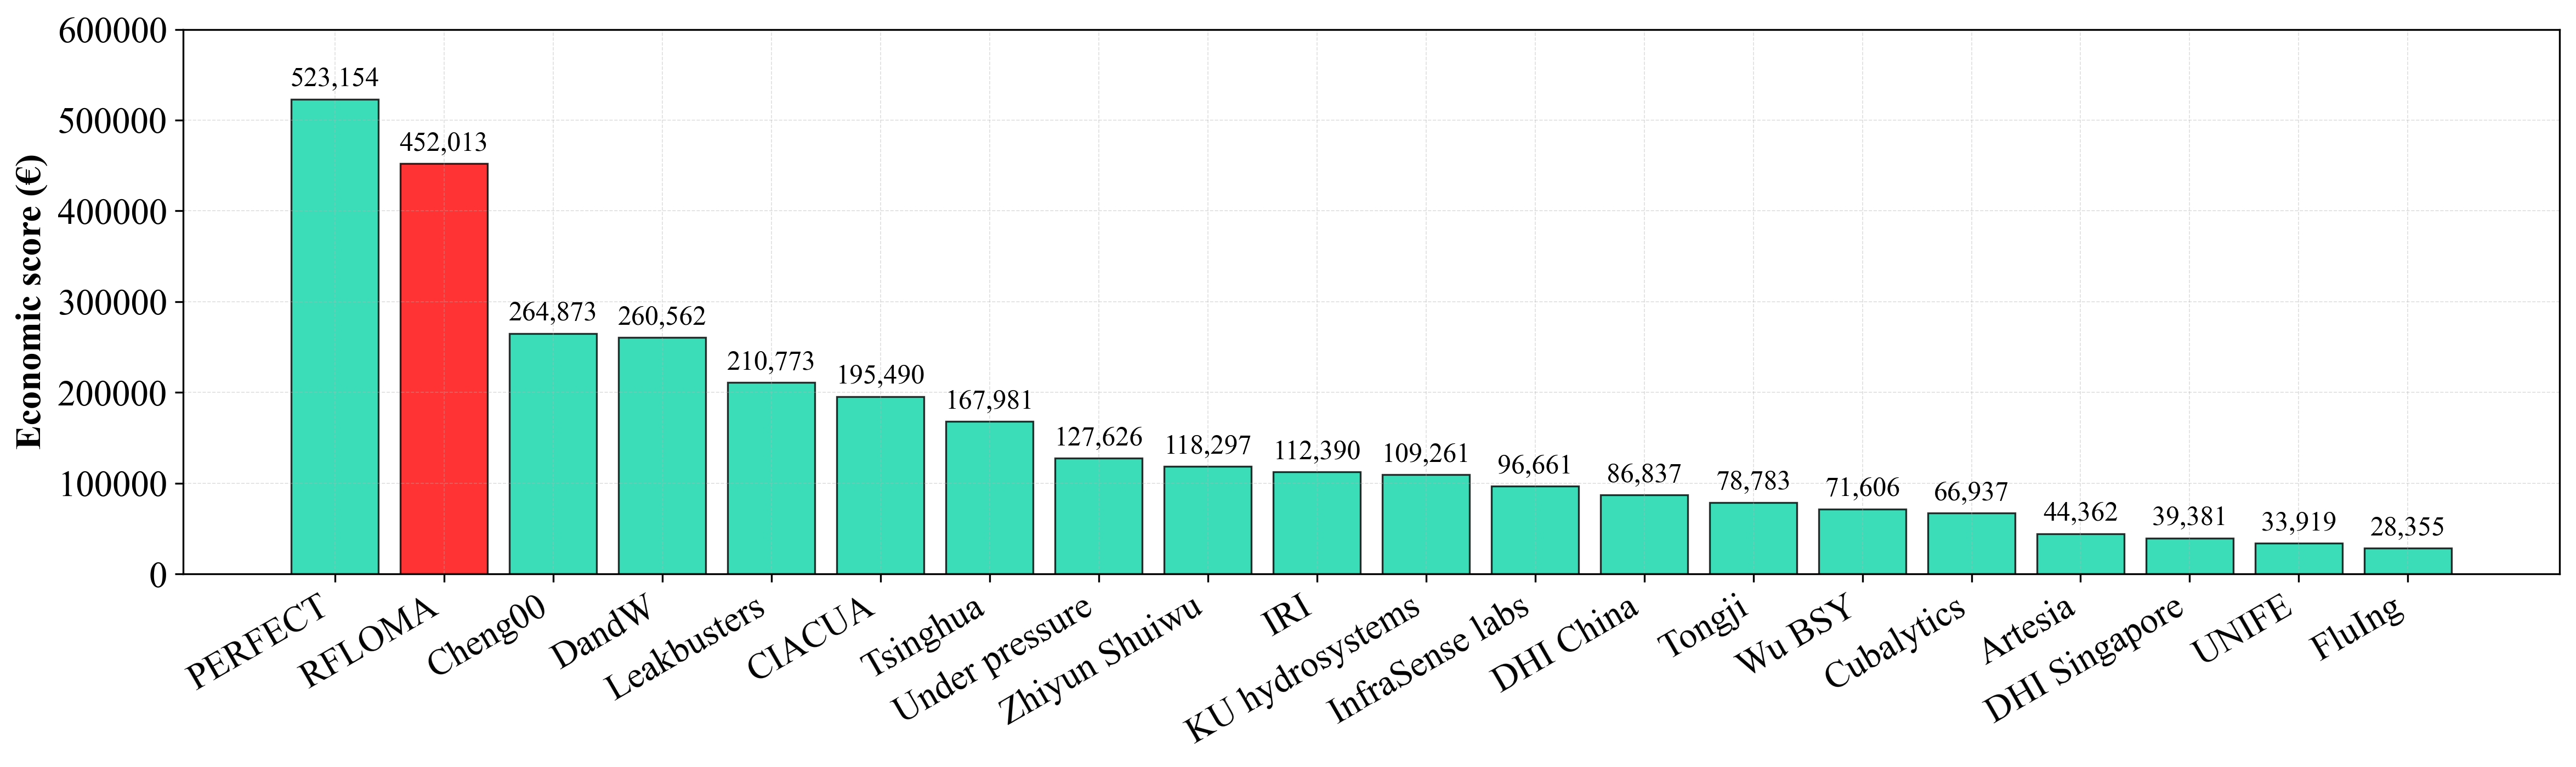

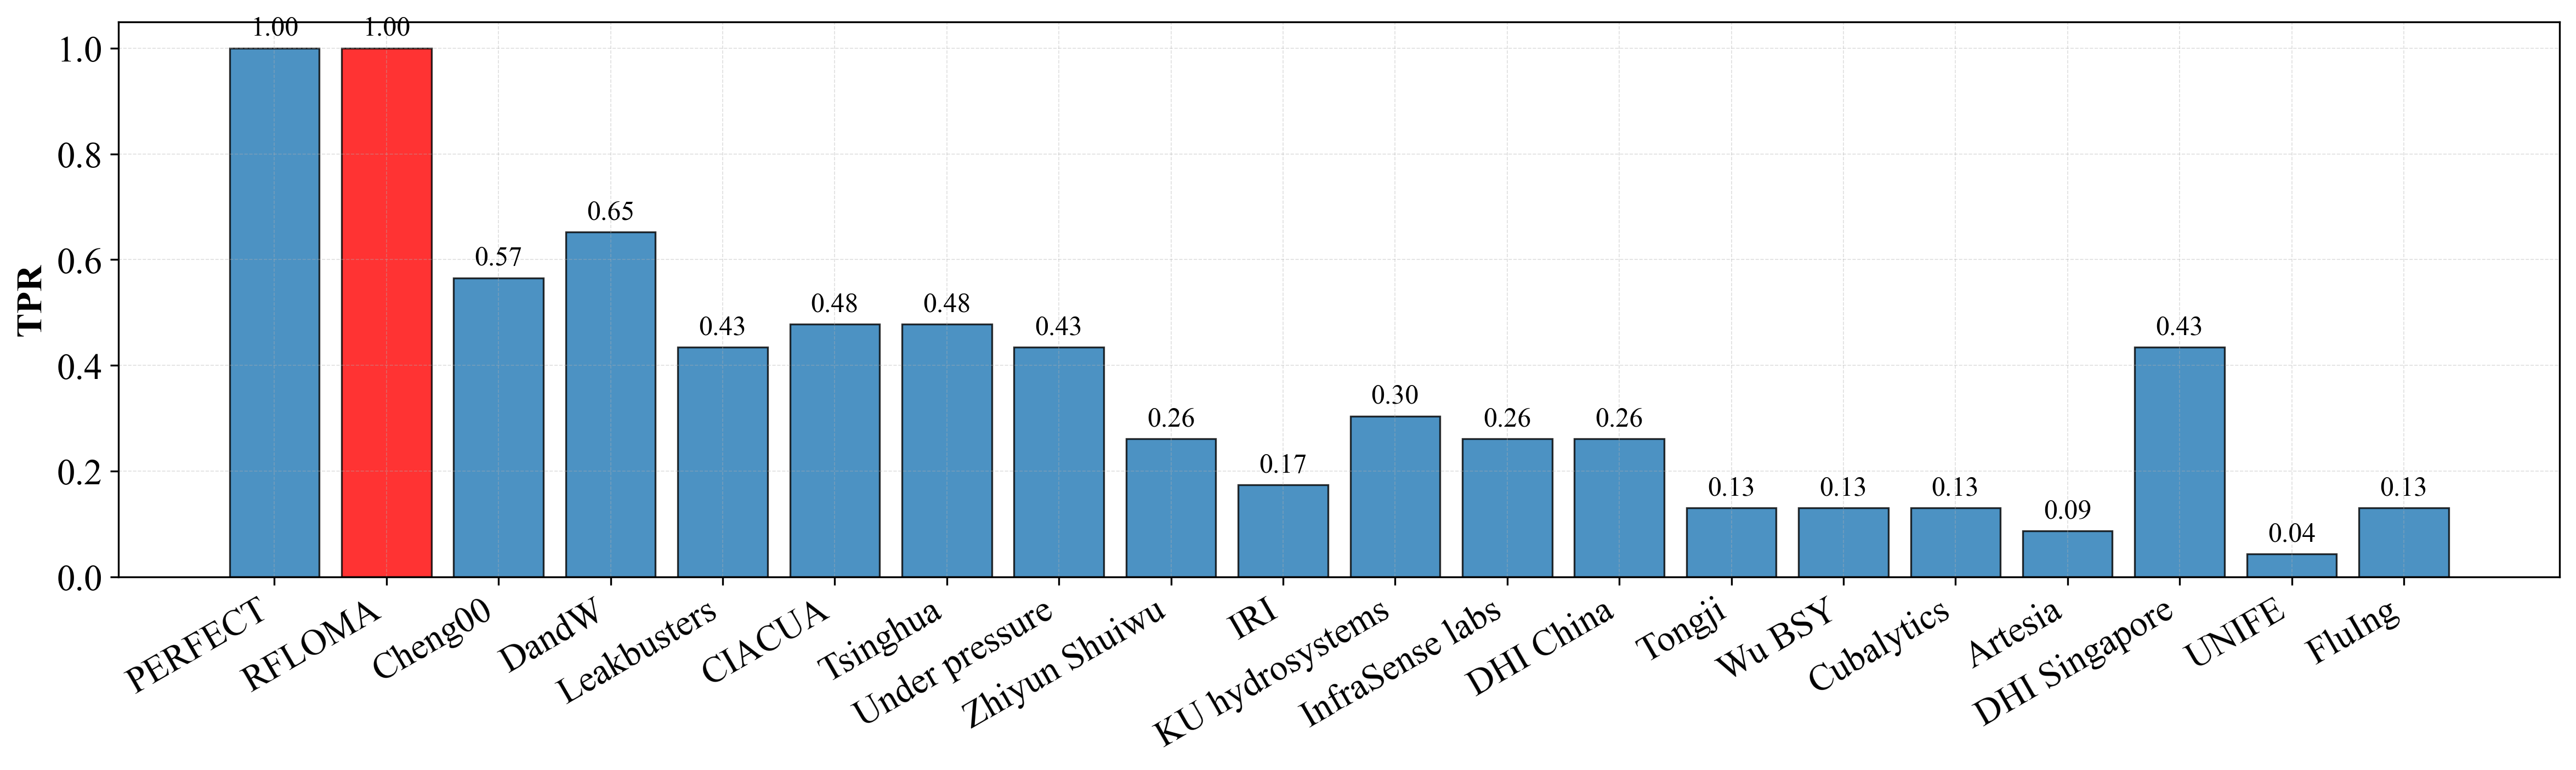

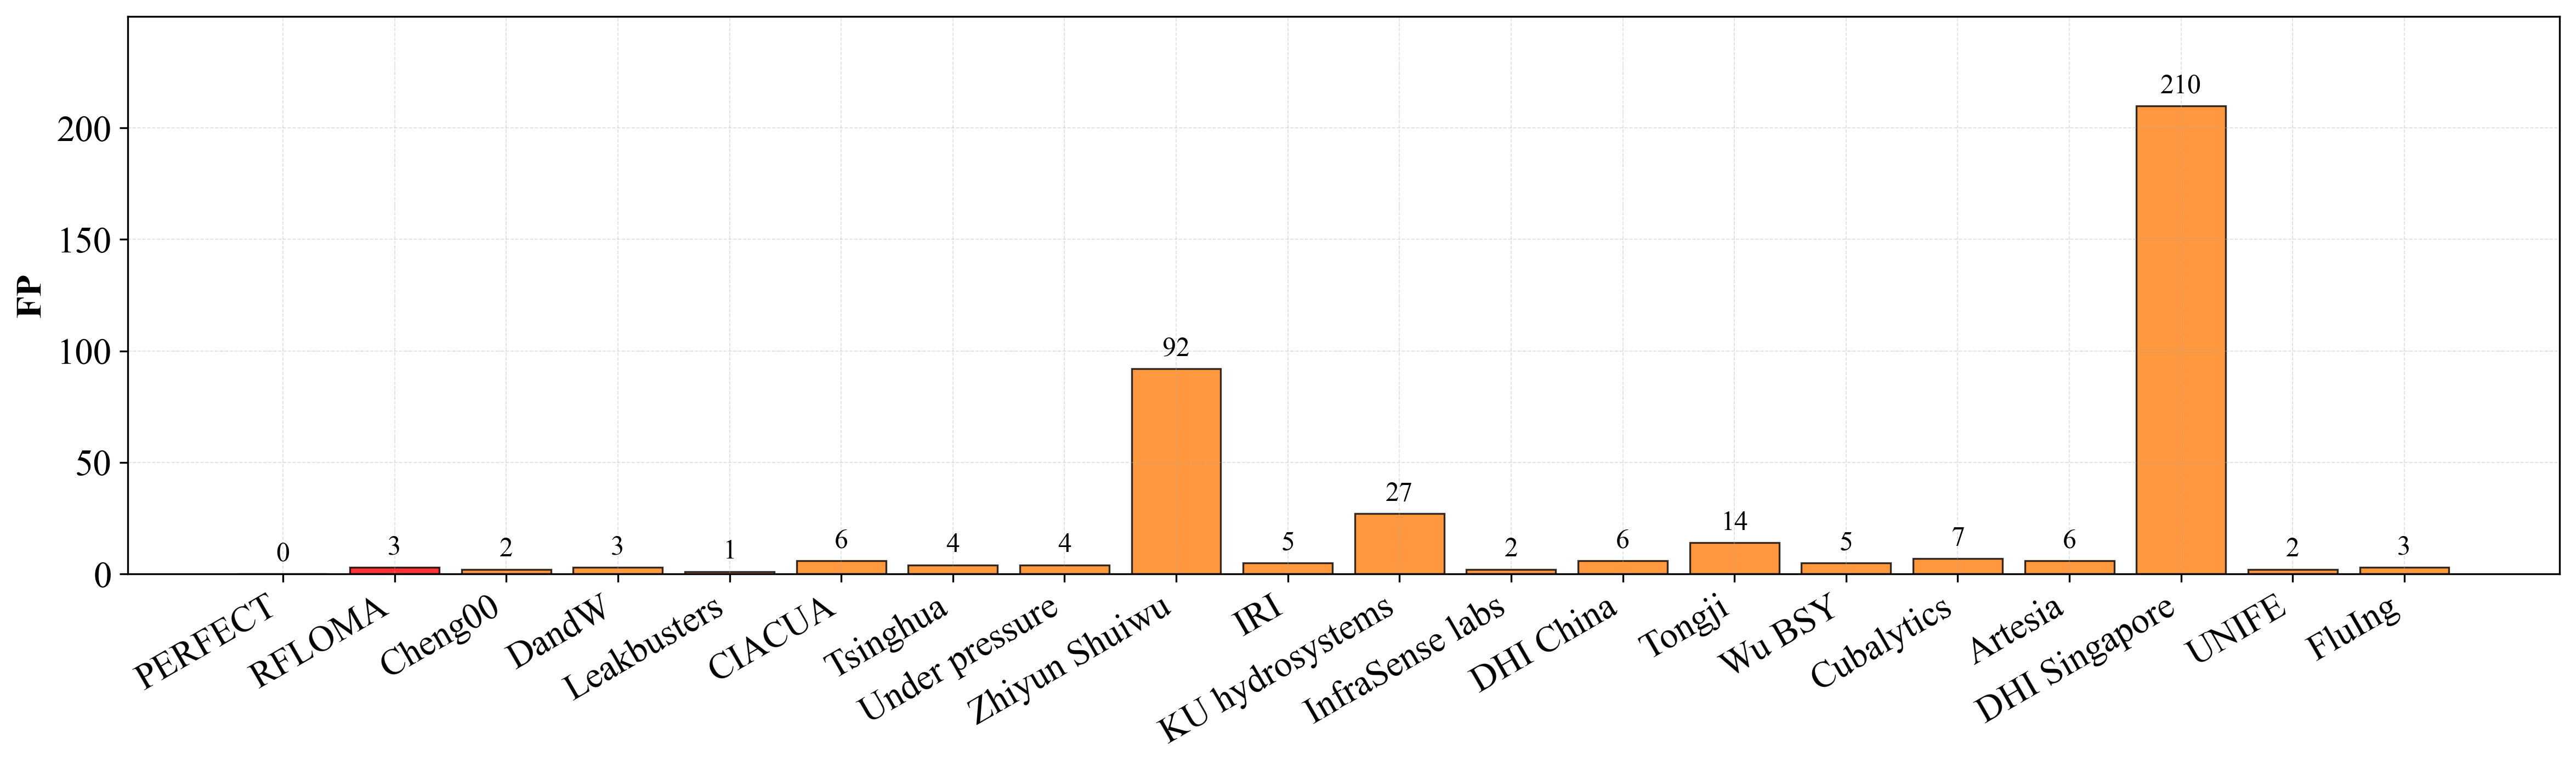

In [32]:
def plot_detection_comparison():
    # 添加数值标签
    def autolabel(bars, ax, fmt="{:.0f}"):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(fmt.format(height),
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom',
                        fontsize=12)

    labels = ['PERFECT', 'RFLOMA', 'Cheng00', 'DandW', 'Leakbusters', 'CIACUA', 'Tsinghua',
              'Under pressure', 'Zhiyun Shuiwu', 'IRI', 'KU hydrosystems', 'InfraSense labs',
              'DHI China', 'Tongji', 'Wu BSY', 'Cubalytics', 'Artesia', 'DHI Singapore',
              'UNIFE', 'FluIng']

    tpr = [1.0000, round(economic_value['2019_']['ABC']['tp'] / economic_value['2019_']['ABC']['total'], 4), 0.5652, 0.6522, 0.4348,
           0.4783, 0.4783, 0.4348, 0.2609, 0.1739, 0.3043, 0.2609, 0.2609, 0.1304, 0.1304,
           0.1304, 0.0870, 0.4348, 0.0435, 0.1304]
    fp = [0, int(economic_value['2019_']['ABC']['fp']), 2, 3, 1, 6, 4, 4, 92, 5, 27, 2, 6, 14, 5, 7, 6, 210, 2, 3]
    score = [523154, int(economic_value['2019_']['ABC']['S']), 264873, 260562, 210773, 195490, 167981, 127626,
             118297, 112390, 109261, 96661, 86837, 78783, 71606, 66937, 44362, 39381, 33919, 28355]

    # === 经济分数图 ===
    fig, ax = plt.subplots(figsize=(16, 5), dpi=300)
    colors = ['#0AD5A7' for _ in range(len(labels))]
    colors[1] = 'red'

    bars = ax.bar(labels, score, color=colors, alpha=0.8, edgecolor='black', linewidth=0.8)
    autolabel(bars, ax, fmt="{:,.0f}")  # 千位分隔符
    ax.set_ylabel('Economic score (€)', fontweight='bold')
    ax.set_yticks(np.arange(0, 650000, 100000))
    # ax.set_title('Economic Score of Different Algorithms', fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.4)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=30, ha='right')

    plt.tight_layout()
    plt.savefig(f"{FIG_PATH}/detection_comparison_ES.png", bbox_inches='tight', dpi=300)
    plt.savefig(f"{FIG_PATH}/detection_comparison_ES.pdf", bbox_inches='tight', dpi=300)
    # plt.close(fig)

    # === TPR 图 ===
    fig, ax = plt.subplots(figsize=(16, 5), dpi=300)
    colors = ['#1F77B4' for _ in range(len(labels))]
    colors[1] = 'red'

    bars = ax.bar(labels, tpr, color=colors, alpha=0.8, edgecolor='black', linewidth=0.8)
    autolabel(bars, ax, fmt="{:.2f}")
    ax.set_ylabel('TPR', fontweight='bold')
    ax.set_ylim(0, 1.05)
    ax.set_yticks(np.arange(0, 1.2, 0.2))
    # ax.set_title('True Positive Rate (TPR) of Different Algorithms', fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.4)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=30, ha='right')

    plt.tight_layout()
    plt.savefig(f"{FIG_PATH}/detection_comparison_TPR.png", bbox_inches='tight', dpi=300)
    plt.savefig(f"{FIG_PATH}/detection_comparison_TPR.pdf", bbox_inches='tight', dpi=300)
    # plt.close(fig)

    # === FP 图 ===
    fig, ax = plt.subplots(figsize=(16, 5), dpi=300)
    colors = ['#FF7F0E' for _ in range(len(labels))]
    colors[1] = 'red'

    bars = ax.bar(labels, fp, color=colors, alpha=0.8, edgecolor='black', linewidth=0.8)
    autolabel(bars, ax, fmt="{:.0f}")
    ax.set_ylabel('FP', fontweight='bold')
    ax.set_ylim(0, 250)
    ax.set_yticks(np.arange(0, 250, 50))
    # ax.set_title('False Positives (FP) of Different Algorithms', fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.4, linewidth=0.4)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=30, ha='right')

    plt.tight_layout()
    plt.savefig(f"{FIG_PATH}/detection_comparison_FP.png", bbox_inches='tight', dpi=300)
    plt.savefig(f"{FIG_PATH}/detection_comparison_FP.pdf", bbox_inches='tight', dpi=300)
    # plt.close(fig)
plot_detection_comparison()

In [2]:
# 框架图

In [13]:
with open(f"{File_PATH}/PUMP_AB_model.pickle", "rb") as f:
    models_DMA_AB = pickle.load(f)
with open(f"{File_PATH}/PUMP_C_model.pickle", "rb") as f:
    models_DMA_C = pickle.load(f)
models = {**models_DMA_AB, **models_DMA_C}

with open(f"{File_PATH}/leak_dataset_2018.pickle", 'rb') as f:
    pressure_reset_data = pickle.load(f)
with open(f"{File_PATH}/no_leak_dataset_2018.pickle", 'rb') as f:
    no_leak_dataset = pickle.load(f)
train_dataset = {}
# 计算无泄漏与泄漏数据差值
for key in no_leak_dataset.keys():
    train_dataset[key] = no_leak_dataset[key].iloc[::3, :] - pressure_reset_data[key]
    train_dataset[key] = train_dataset[key].dropna()

pump_flow = train_dataset['Flows (m3_h)']['PUMP_1']
pressure = train_dataset['Pressures (m)']
fix_pressure = pd.DataFrame(index=pressure.index, columns=pressure.columns)
pre_error = pd.DataFrame(0, index=pressure.index, columns=pressure.columns)

# 模型逐传感器预测
for sensor, model in models.items():
    pre = predict_pump_model(model, pressure[sensor], pump_flow, q=48)
    pre_error.loc[pre_error.index[-len(pre):], sensor] = pre
    fix_pressure[sensor] = pressure[sensor] - pre_error[sensor]
    print(f"{sensor} 修正完成")

D:\xiang\CX_application\Anconda3\envs\pytorch\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
D:\xiang\CX_application\Anconda3\envs\pytorch\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


n54 修正完成
n105 修正完成
n114 修正完成
n163 修正完成
n188 修正完成
n288 修正完成
n296 修正完成
n332 修正完成
n342 修正完成
n410 修正完成
n415 修正完成
n429 修正完成
n458 修正完成
n469 修正完成
n495 修正完成
n506 修正完成
n516 修正完成
n519 修正完成
n549 修正完成
n613 修正完成
n636 修正完成
n644 修正完成
n679 修正完成
n722 修正完成
n726 修正完成
n740 修正完成
n752 修正完成
n769 修正完成
n215 修正完成
n229 修正完成
n1 修正完成
n4 修正完成
n31 修正完成


In [15]:
leak_demand = pressure_reset_data['LeakDemands (L_h)'] / 12 / 1000
columns = [col.split("_")[0] for col in leak_demand.columns]
leak_demand.columns = columns

In [50]:
def run(fix_pressure, fis_param, sensors = None):
    """
    基于FIS的泄漏识别
    :param fix_pressure: 修正后的压力时序数据
    :param fis_param: FIS参数
    :param sensors: 传感器列表
    :return: fis_result, day_result_step, pressure_result
    fis_result: 模糊推理结果，每个传感器的状态结果
    day_result_step: 去除已有泄漏的中间状态
    pressure_result: 修正后的压力时序数据（去除已有泄漏的影响）
    """
    day_pressure = fix_pressure.resample('D').mean()
    fix_pressure_2 = fix_pressure.resample('D').mean()
    # fix_pressure_2.loc[:, :] -= (fix_pressure_2.loc[fix_pressure_2.index[0], :])
    # print(fix_pressure_2)
    pressure_result = pd.DataFrame(columns=fix_pressure_2.columns)
    sensor_features = {col: pd.DataFrame() for col in fix_pressure_2.columns}
    fis_result = {col: pd.DataFrame() for col in fix_pressure_2.columns}
    correction_value = pd.DataFrame(0, index=fix_pressure_2.index, columns=fix_pressure_2.columns)

    noise_tolerance_days = 3  # 新增：Noise 容忍天数
    if sensors is None:
        print("未指定传感器. 请指定 DMA_AB_sensors 或 DMA_C_sensors.")
        return None

    leak_thresh = fis_param['leak_thresh']
    fis = LeakageFIS(
        fis_param['th_diff1'],
        fis_param['th_diff4'],
        fis_param['th_diff7'],
    )

    # 初始化状态存储

    def init_state_store():
        state_store = {}
        for col in fix_pressure_2.columns:
            state_store[col] = {
                'prev_state': None,
                'in_leak': False,
                'leak_start': None,
                'neg_cum': 0.0,
                'leak_cum': 0.0,
                'leak_days': 0,
                'recent_noise_days': 0,  # 新增：记录连续Noise天数
            }
        return state_store

    state_store = init_state_store()
    for current_day in fix_pressure_2.index:
        day_result = fix_pressure_2.loc[current_day]
        day_result = day_result.to_frame().T
        day_result.index = [current_day]

        def mark_model_correction(start_dt, end_dt, flag):
            for colname in sensors:
                rng = pd.date_range(start=start_dt, end=end_dt, freq='D')
                for d in rng:
                    if d not in fis_result[colname].index:
                        placeholder = fis_result[colname].iloc[[-1]].copy()
                        placeholder.index = [d]
                        placeholder.loc[d, :] = placeholder.loc[placeholder.index[0], :].where(
                            pd.notna(placeholder.loc[placeholder.index[0], :]), np.nan)
                        fis_result[colname] = pd.concat([fis_result[colname], placeholder])
                    fis_result[colname].at[d, 'model_correction'] = True
                if flag == 'Leak':
                    correction_value.loc[end_dt:, colname] += fix_pressure_2.loc[end_dt, colname]
                    fix_pressure_2.loc[:, colname] -= (fix_pressure_2.loc[end_dt, colname])
                elif flag == 'End':
                    correction_value.loc[end_dt:, colname] += (fix_pressure_2.loc[end_dt, colname])
                    fix_pressure_2.loc[:, colname] -= (fix_pressure_2.loc[end_dt, colname])
                else:
                    current_vals = fix_pressure_2.loc[end_dt, sensors]
                    v_min = current_vals.min()
                    if v_min < 0:
                        for colname in sensors:
                            fix_pressure_2.loc[:, colname] -= v_min
                            correction_value.loc[end_dt:, colname] += v_min


        def mark_leak(colname, at_dt, current_day):
            if at_dt not in fis_result[colname].index:
                placeholder = fis_result[colname].iloc[[-1]].copy()
                placeholder.index = [at_dt]
                fis_result[colname] = pd.concat([fis_result[colname], placeholder])
            fis_result[colname].at[at_dt, 'leak_flag'] = True
            fis_result[colname].at[current_day, 'detection_flag'] = True

        # --- 累积窗口结果 ---
        is_correction = False
        is_flag = None
        start_correction = fix_pressure_2.index.max()
        start_day = current_day - pd.Timedelta(days=7)
        recent_days = fix_pressure_2.loc[max(start_day, fix_pressure_2.index[0]):current_day + pd.Timedelta(days=1)]

        for col in sensors:
            y_recent = recent_days[col].fillna(method='ffill').fillna(0)
            features = compute_multiscale_features(y_recent)
            time = current_day-pd.Timedelta(days=1) if current_day != day_pressure.index[0] else current_day
            fis_out = fis.evaluate_series(day_pressure.loc[time,col],features[['diff_1', 'diff_4', 'diff_7']])

            if current_day in features.index:
                today_feature = features.loc[[current_day]]
                today_fis = fis_out.loc[[current_day]]

                if sensor_features[col].empty:
                    sensor_features[col] = today_feature.copy()
                else:
                    sensor_features[col] = pd.concat([sensor_features[col], today_feature])

                if fis_result[col].empty:
                    fis_result[col] = today_fis.copy()
                    for fld in ['leak_cum', 'neg_cum' ,'leak_days', 'leak_flag', 'model_correction',
                                'detection_flag']:
                        fis_result[col][fld] = np.nan if fld not in ['leak_flag', 'model_correction'] else False
                else:
                    fis_result[col] = pd.concat(
                        [fis_result[col], today_fis[~today_fis.index.isin(fis_result[col].index)]])
                    for fld in ['leak_cum', 'neg_cum' ,'leak_days', 'leak_flag', 'model_correction',
                                'detection_flag']:
                        if fld not in fis_result[col].columns:
                            fis_result[col][fld] = np.nan if fld not in ['leak_flag', 'model_correction'] else False

                # === 状态机逻辑更新 ===
                s = state_store[col]
                curr = str(today_fis['State'].iloc[0]) if 'State' in today_fis.columns else None
                s['neg_cum'] = min(0, day_result.loc[current_day, col])
                if s['neg_cum'] < -leak_thresh:
                    is_correction = True
                    start_correction = min(start_correction, current_day)
                    is_flag = 'Neg'

                # === Leak 状态判定 ===
                if curr == 'Leak':
                    # 开始或持续渐进
                    if not s['in_leak']:
                        s['in_leak'] = True
                        s['leak_start'] = current_day
                        s['leak_cum'] = max(0, day_result.loc[current_day, col])
                        s['leak_days'] = 1
                    else:
                        # 突变结束（prev was Sudden）
                        s['leak_cum'] = max(0, s['leak_cum']+day_result.loc[current_day, col])
                        s['leak_days'] += 1
                    s['recent_noise_days'] = 0  # 重置噪声计数

                elif curr == 'Noise':
                    # 若已处于渐进状态且渐进天数>4
                    if s['in_leak'] and s['leak_days'] > 4:
                        s['recent_noise_days'] += 1
                        # 若噪声未连续3天以内，继续保持渐进状态
                        if s['recent_noise_days'] <= noise_tolerance_days:
                            s['leak_cum'] = max(0, s['leak_cum']+day_result.loc[current_day, col])
                            fis_result[col].at[current_day, 'State'] = 'Leak'
                        else:
                            # 超出容忍天数，认为渐进结束
                            # 若此前已满足阈值或天数，则标记模型校正区间
                            if (s['leak_cum'] < leak_thresh):
                                s.update({
                                    'in_leak': False,
                                    'leak_start': None,
                                    'leak_cum': 0.0,
                                    'leak_days': 0,
                                    'recent_noise_days': 0,
                                    'is_leak': False
                                })
                    else:
                        # 结束标志
                        if s['in_leak']:
                            if (s['leak_cum'] < leak_thresh):
                                s.update({
                                    'in_leak': False,
                                    'leak_start': None,
                                    'leak_cum': 0.0,
                                    'leak_days': 0,
                                    'recent_noise_days': 0,
                                    'is_leak': False
                                })
                elif curr == 'End':
                    # 状态为End 一定模型校正
                    is_correction = True
                    start_correction = min(start_correction, current_day)
                    is_flag = 'End'

                # 更新结果持久化
                fis_result[col].at[current_day, 'leak_cum'] = s['leak_cum']
                fis_result[col].at[current_day, 'leak_days'] = s['leak_days']

                # 在渐进状态下 达到 阈值 则直接标记并进行模型校正
                if (s['leak_cum'] >= leak_thresh):
                    mark_leak(col, s['leak_start'], current_day)
                    is_correction = True
                    start_correction = min(start_correction, s['leak_start'])
                    is_flag = 'Leak'

                s['prev_state'] = curr
        pressure_result = pd.concat([pressure_result, fix_pressure_2.loc[current_day].to_frame().T])
        if is_correction:
            mark_model_correction(start_correction, current_day, is_flag)
            if is_flag == 'Leak':
                for col in state_store.keys():
                    s = state_store[col]
                    s.update({
                        'in_leak': False,
                        'leak_start': None,
                        'leak_cum': 0.0,
                        'recent_noise_days': 0,
                        'is_leak': False
                    })

    return fis_result, fix_pressure_2, pressure_result, correction_value

In [67]:
FRAME_PATH = os.path.join("..", "frame_fig")

In [68]:
def draw_plot(data, title=""):
    """
    绘制时间序列数据曲线
    :param data: pandas Series 或 DataFrame，表示待绘制的数据
    :param title: 图标题
    """
    data.plot(figsize=(12, 6), title=title)
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{FRAME_PATH}/{title}")
    plt.show()

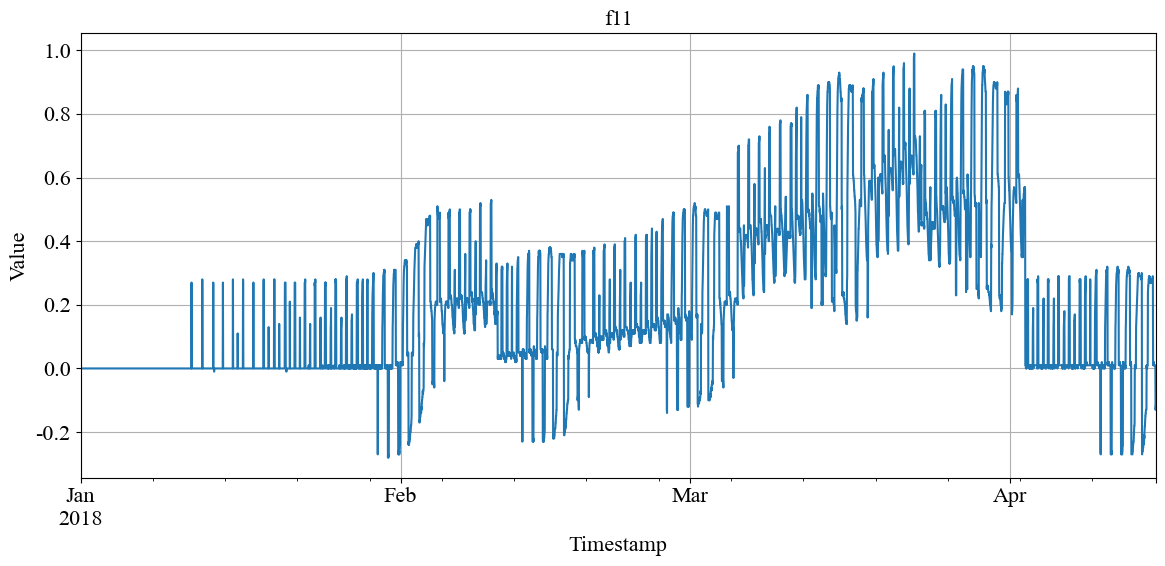

In [69]:
draw_plot(pressure['n114'][0:10000],title='f11')

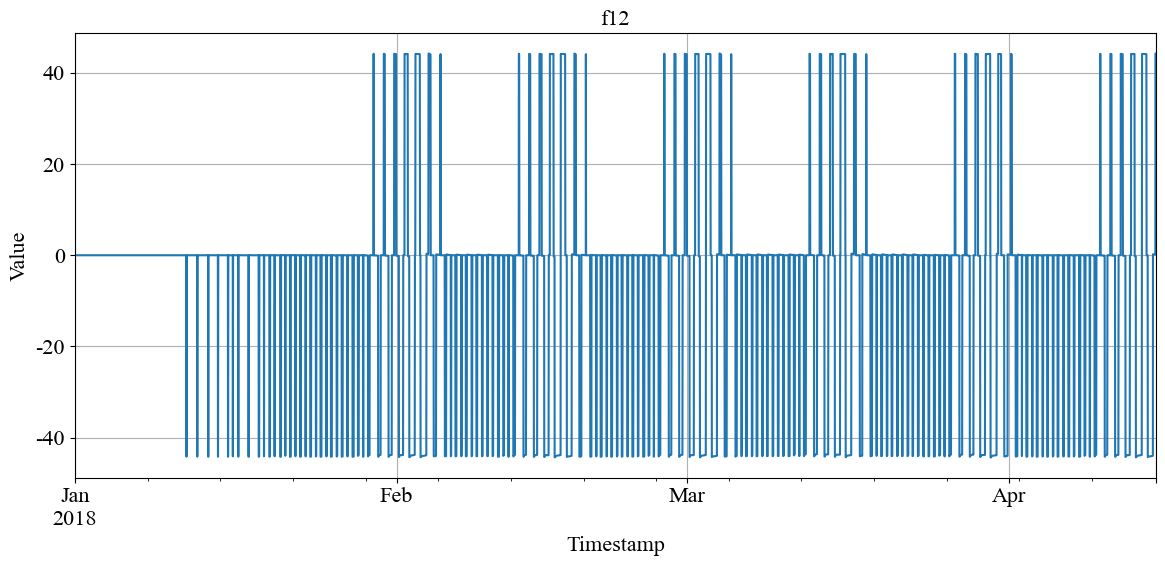

In [70]:
draw_plot(pump_flow[0:10000],title='f12')

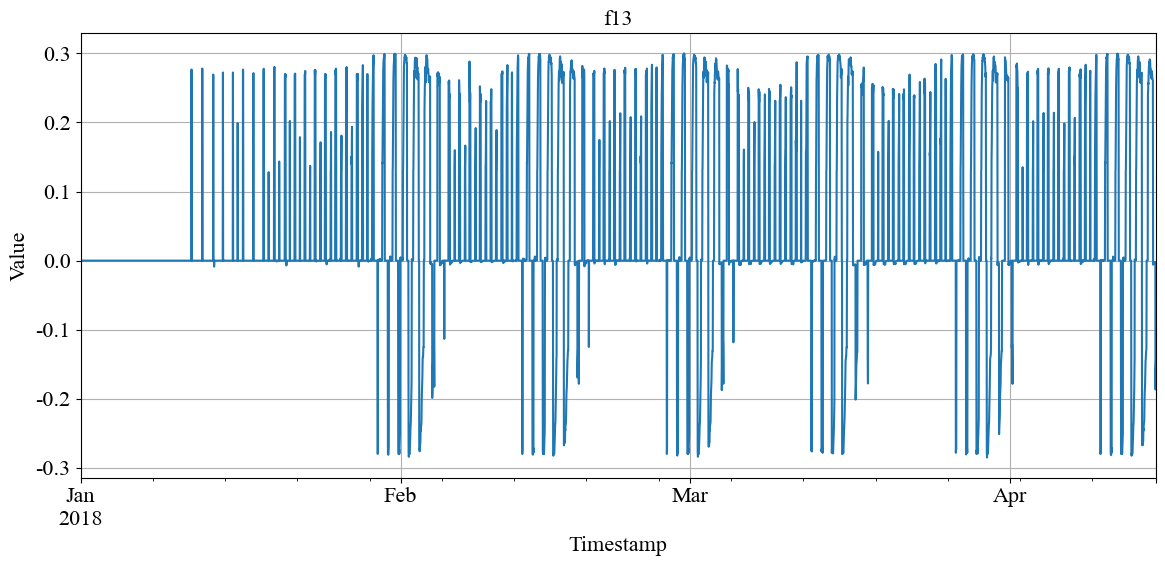

In [71]:
draw_plot(pre_error['n114'][0:10000],title='f13')

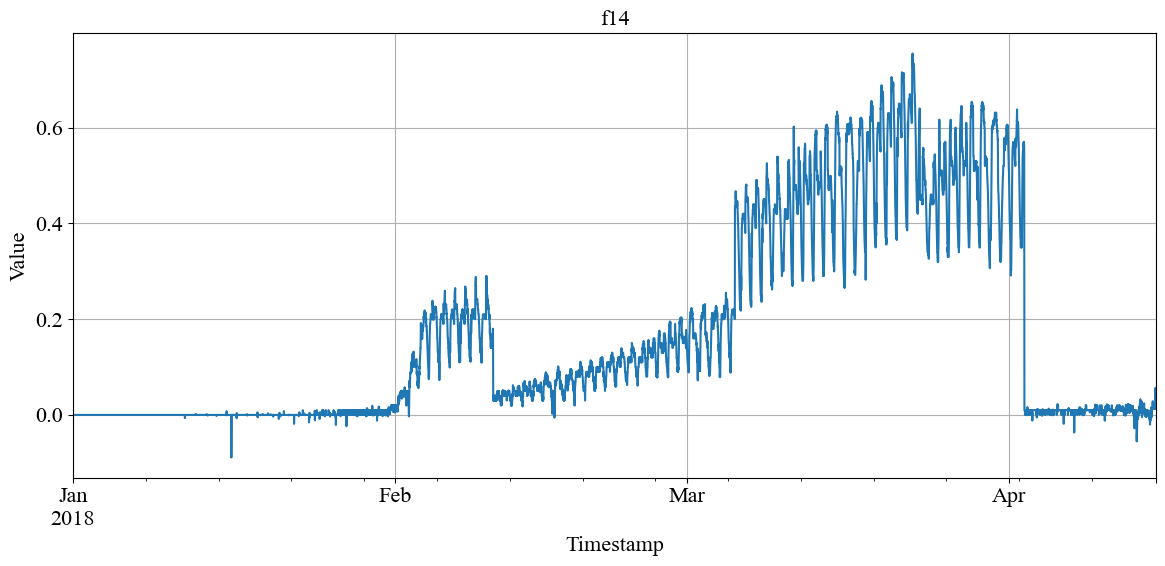

In [72]:
draw_plot(fix_pressure['n114'][0:10000],'f14')

In [51]:
fis_result, fix_pressure_2, pressure_result, correction_value = run(fix_pressure, init_fis_params('AB'), DMA_AB_sensors)

In [52]:
# 1. 让 index 带有时间信息（每天 00:00）
correction_value.index = pd.to_datetime(correction_value.index)

# 2. 生成完整的 15 min 频率索引
full_index = pd.date_range(
    start=correction_value.index.min(),
    end=correction_value.index.max() + pd.Timedelta(days=1) - pd.Timedelta(minutes=15),
    freq="15min"
)

# 3. 重索引 + 向前填充
correction_15min = correction_value.reindex(full_index, method='ffill')

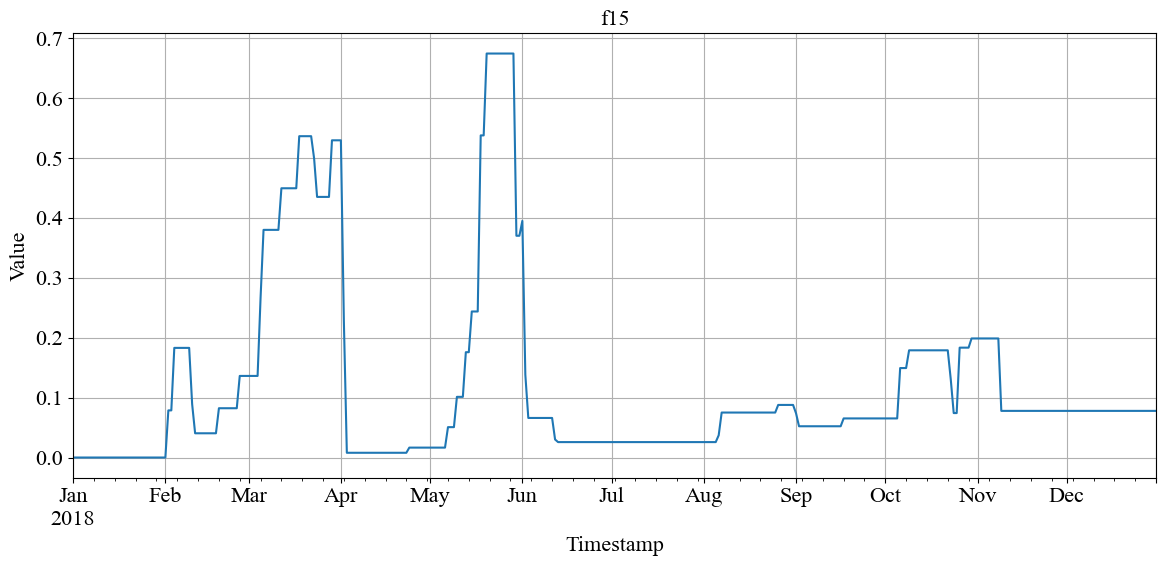

In [76]:
draw_plot(correction_value['n114'],'f15')

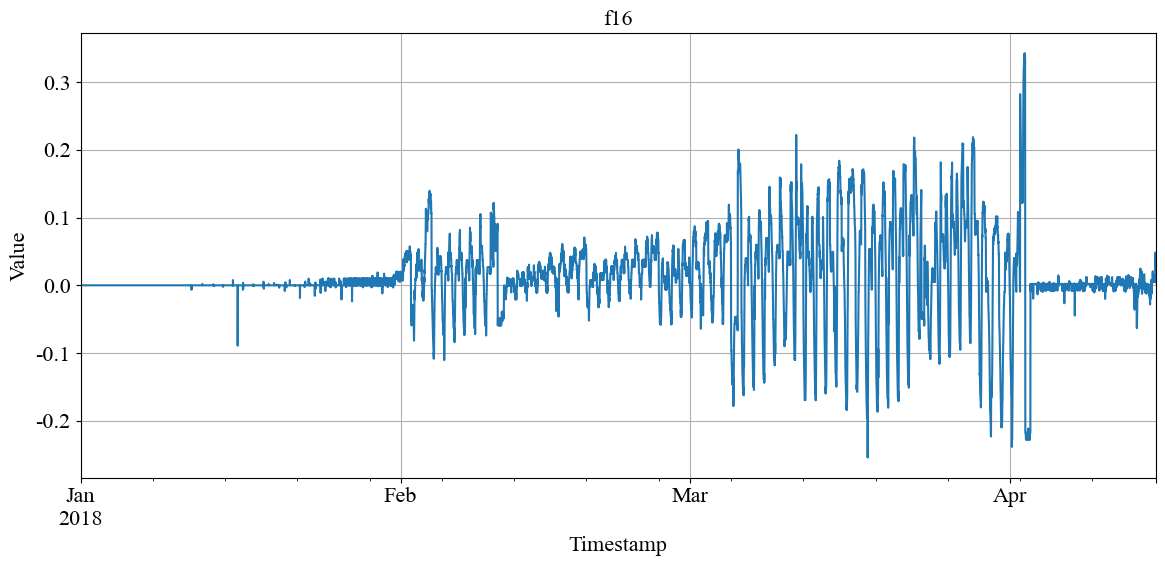

In [77]:
draw_plot((fix_pressure['n114'] - correction_15min['n114'])[0:10000], "f16")

In [78]:
# 动态阈值

In [80]:
day_pressure = fix_pressure.resample("D").mean()
day_pressure

n1        n4       n31       n54      n105      n114  \
Timestamp                                                                
2018-01-01 -0.000331 -0.000351 -0.000306  0.000000  0.000000  0.000000   
2018-01-02 -0.000649 -0.000687 -0.000600  0.000000  0.000000  0.000000   
2018-01-03 -0.000649 -0.000687 -0.000600  0.000000  0.000000  0.000000   
2018-01-04 -0.000649 -0.000687 -0.000600  0.000000  0.000000  0.000000   
2018-01-05 -0.000649 -0.000687 -0.000600  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2018-12-27  0.302763  0.149781  0.135906  0.187788  0.068933  0.078723   
2018-12-28  0.228132  0.077124  0.064674  0.170224  0.063089  0.070740   
2018-12-29  0.419549  0.276118  0.263474  0.159529  0.059753  0.069157   
2018-12-30  0.415183  0.266531  0.248958  0.178832  0.067384  0.076728   
2018-12-31  0.384087  0.235167  0.216539  0.181948  0.067299  0.076995   

                n163      n188  n215      n229  ...      n549      n613  \
Timestamp                                       ...                       
2018-01-01  0.000000  0.000000   0.0  0.000000  ...  0.000000  0.000000   
2018-01-02  0.000000  0.000000   0.0  0.000000  ...  0.000000  0.000000   
2018-01-03  0.000000  0.000000   0.0  0.000000  ...  0.000000  0.000000   
2018-01-04  0.000000  0.000000   0.0  0.000000  ...  0.000000  0.000000   
2018-01-05  0.000000  0.000000   0.0  0.000000  ...  0.000000  0.000000   
...              ...       ...   ...       ...  ...       ...       ...   
2018-12-27  0.166061  0.168459   0.0  0.179295  ...  0.113237  0.198534   
2018-12-28  0.150893  0.153349   0.0  0.165919  ...  0.102570  0.185068   
2018-12-29  0.140413  0.143744   0.0  0.152386  ...  0.097109  0.172094   
2018-12-30  0.158856  0.160515   0.0  0.171078  ...  0.110384  0.188994   
2018-12-31  0.159901  0.162533   0.0  0.173353  ...  0.109795  0.192912   

                n636      n644      n679      n722      n726      n740  \
Timestamp                                                                
2018-01-01  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-01-03  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2018-01-05  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2018-12-27  0.155094  0.174326  0.159331  0.122671  0.158447  0.063042   
2018-12-28  0.144605  0.161882  0.148761  0.113255  0.147353  0.059700   
2018-12-29  0.133721  0.149908  0.138979  0.108155  0.138572  0.056398   
2018-12-30  0.147985  0.165926  0.152365  0.117317  0.152296  0.062186   
2018-12-31  0.150900  0.168765  0.153675  0.118546  0.154470  0.061779   

                n752      n769  
Timestamp                       
2018-01-01  0.000000  0.000000  
2018-01-02  0.000000  0.000000  
2018-01-03  0.000000  0.000000  
2018-01-04  0.000000  0.000000  
2018-01-05  0.000000  0.000000  
...              ...       ...  
2018-12-27  0.169943  0.128408  
2018-12-28  0.160156  0.120631  
2018-12-29  0.150191  0.113641  
2018-12-30  0.163982  0.123259  
2018-12-31  0.165990  0.124174  

[365 rows x 33 columns]

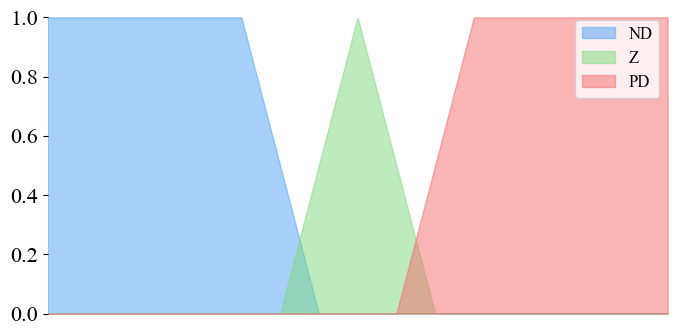

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# --- 基本隶属函数 ---
def trapezoid(x, a, b, c, d):
    return np.maximum(np.minimum(np.minimum((x - a)/(b - a + 1e-12), 1),
                                 (d - x)/(d - c + 1e-12)), 0)

def triangle(x, a, b, c):
    return np.maximum(np.minimum((x - a)/(b - a + 1e-12),
                                 (c - x)/(c - b + 1e-12)), 0)

# --- fuzzify_diff1 ----
def fuzzify_diff1(xs, TH):
    ND = trapezoid(xs, -1e6, -TH*2, -TH*1.5, -TH*0.5)
    Z  = triangle(xs, -TH, 0, TH)
    PD = trapezoid(xs, TH*0.5, TH*1.5, TH*2, 1e6)
    return ND, Z, PD

# --- 绘图 ---
TH = 10
xs = np.linspace(-40, 40, 800)

ND, Z, PD = fuzzify_diff1(xs, TH)

plt.figure(figsize=(8, 4))

# 填充面积
plt.fill_between(xs, ND, color="#4fa3f7", alpha=0.5, label="ND")
plt.fill_between(xs, Z,  color="#7dd87d", alpha=0.5, label="Z")
plt.fill_between(xs, PD, color="#f46b6b", alpha=0.5, label="PD")

# 去除所有坐标轴刻度 + 坐标数字
plt.xticks([])
# plt.yticks([])

# 去除边框
plt.box(False)

# 去除标题和 xlabel/ylabel
plt.title("")
plt.xlabel("")
plt.ylabel("")

plt.legend()

plt.ylim([-0.02, 1.02])
plt.xlim([xs.min(), xs.max()])
plt.savefig(f"{FRAME_PATH}/f21")
plt.show()
